## Create visualizations for high wage jobs in California

Need to begin by specifying the desired year.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import squarify
import seaborn as sns
import string
import warnings
import os
import re
from datetime import datetime
from jqi_functions import *
import plotly.express as px
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [73]:
year = '2020'
col_year = '2019'

In [74]:
data = pd.read_csv(f'data/outputs/hw_outputs_{year}.csv')

In [75]:
county_info = pd.read_csv('data/county_to_regions_key.csv')

In [76]:
cost_of_living = pd.read_csv(f'data/cost_of_living/united-way-col-1A1PS1C{col_year}.csv') # 1 adult, 1 preschooler, 1 child

In [77]:
data.head()

,Industry,Date,Region,High Wage Count,Employment Count,Cost of Living
0,accommodation and food services,2020-01-01,Inland Empire,18315,154200.0,63149
1,accommodation and food services,2020-02-01,Inland Empire,18623,156800.0,63149
2,accommodation and food services,2020-03-01,Inland Empire,18279,153900.0,63149
3,accommodation and food services,2020-04-01,Inland Empire,11354,95600.0,63149
4,accommodation and food services,2020-05-01,Inland Empire,12174,102500.0,63149


In [78]:
# data = data[['Industry', 'Date', 'County', 'CDI Regions', 'Rural/Urban', 'Population', 'High Wage Count', 'Employment Count', 'Cost of Living']]

In [79]:
# data['Population'] = normalize_titles(data['Population']).astype(int)

### Histogram of wages by industry

In [80]:
ca_ipums = cleaned_ipums(year)

In [81]:
ca_ipums.head()

,YEAR,COUNTYFIP,INDNAICS,PERWT,INCWAGE,NAICS Code,Industry Title,Industry,Crosswalk Value
0,2020,73,928110p4,79.0,62000,928110p4,us marines,us marines,36
1,2020,73,928110p4,64.0,24000,928110p4,us marines,us marines,36
2,2020,73,928110p4,66.0,30000,928110p4,us marines,us marines,36
3,2020,73,928110p4,58.0,24000,928110p4,us marines,us marines,36
4,2020,73,928110p4,75.0,20000,928110p4,us marines,us marines,36


In [82]:
ca_ipums_wages = ca_ipums.groupby(by=['Crosswalk Value']).mean()

In [90]:
ca_ipums_wages_regions = pd.merge(ca_ipums, county_info, on='COUNTYFIP').groupby(by=['CERF Regions']).mean()

In [85]:
ca_ipums_minelog = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 1) |
                               (ca_ipums['Crosswalk Value'] == 3)]

ca_ipums_farm = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 2)]

ca_ipums_const = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 3) |
                             (ca_ipums['Crosswalk Value'] == 4) |
                             (ca_ipums['Crosswalk Value'] == 5) |
                             (ca_ipums['Crosswalk Value'] == 6) |
                             (ca_ipums['Crosswalk Value'] == 7)]

ca_ipums_manu = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 8) |
                            (ca_ipums['Crosswalk Value'] == 9) |
                            (ca_ipums['Crosswalk Value'] == 10)]

ca_ipums_ttu = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 11) |
                           (ca_ipums['Crosswalk Value'] == 12) |
                           (ca_ipums['Crosswalk Value'] == 13) |
                           (ca_ipums['Crosswalk Value'] == 14) |
                           (ca_ipums['Crosswalk Value'] == 15) |
                           (ca_ipums['Crosswalk Value'] == 16) |
                           (ca_ipums['Crosswalk Value'] == 17)]

ca_ipums_info = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 18)]

ca_ipums_fin = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 19) |
                           (ca_ipums['Crosswalk Value'] == 20) |
                           (ca_ipums['Crosswalk Value'] == 21)]

ca_ipums_prof = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 22) |
                            (ca_ipums['Crosswalk Value'] == 23) |
                            (ca_ipums['Crosswalk Value'] == 24) |
                            (ca_ipums['Crosswalk Value'] == 25)]

ca_ipums_eduhealth = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 26) |
                                 (ca_ipums['Crosswalk Value'] == 27) |
                                 (ca_ipums['Crosswalk Value'] == 28)]

ca_ipums_leisure = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 29) |
                               (ca_ipums['Crosswalk Value'] == 30) |
                               (ca_ipums['Crosswalk Value'] == 31)]

ca_ipums_other = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 32) |
                             (ca_ipums['Crosswalk Value'] == 33) |
                             (ca_ipums['Crosswalk Value'] == 34) |
                             (ca_ipums['Crosswalk Value'] == 35) |
                             (ca_ipums['Crosswalk Value'] == 0)]

ca_ipums_gov = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 36) |
                           (ca_ipums['Crosswalk Value'] == 37) |
                           (ca_ipums['Crosswalk Value'] == 38)]

In [86]:
main_ind_dfs = [ca_ipums_minelog, ca_ipums_farm, ca_ipums_const, ca_ipums_manu, ca_ipums_ttu, ca_ipums_info, ca_ipums_fin, ca_ipums_prof, ca_ipums_eduhealth, ca_ipums_leisure, ca_ipums_other, ca_ipums_gov]

In [87]:
main_ind_titles = ['Mining & Logging', 'Total Farm', 'Construction', 'Manufacturing', 'Trade, Transportation, & Utilities', 'Information', 'Financial Activities', 'Professional & Business Services', 'Educational & Health Services', 'Leisure & Hospitality', 'Other Services', 'Government']

In [88]:
def plot_hist(df_lists, titles):
    fig, ax = plt.subplots(6, 2, figsize=(24,30))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
    n_col = 0
    n_row = 0
    for i in range(len(df_lists)):
        ax[n_row, n_col].hist(df_lists[i]['INCWAGE'], bins=50, color='#5797c2')
        ax[n_row, n_col].set_title(titles[i], fontsize=14, weight='bold', pad=20, color='#545454')
        ax[n_row, n_col].set_xlabel('Average Wage Per Industry', fontsize=12, weight='bold', color = '#545454')
        ax[n_row, n_col].xaxis.set_label_coords(0.15, -0.12)
        ax[n_row, n_col].spines['top'].set_visible(False)
        ax[n_row, n_col].spines['right'].set_visible(False)
        ax[n_row, n_col].spines['bottom'].set_linewidth(0.5)
        ax[n_row, n_col].spines['left'].set_linewidth(0.5)
        n_col += 1
        if n_col == 2:
            n_col = 0
            n_row += 1
    plt.show()

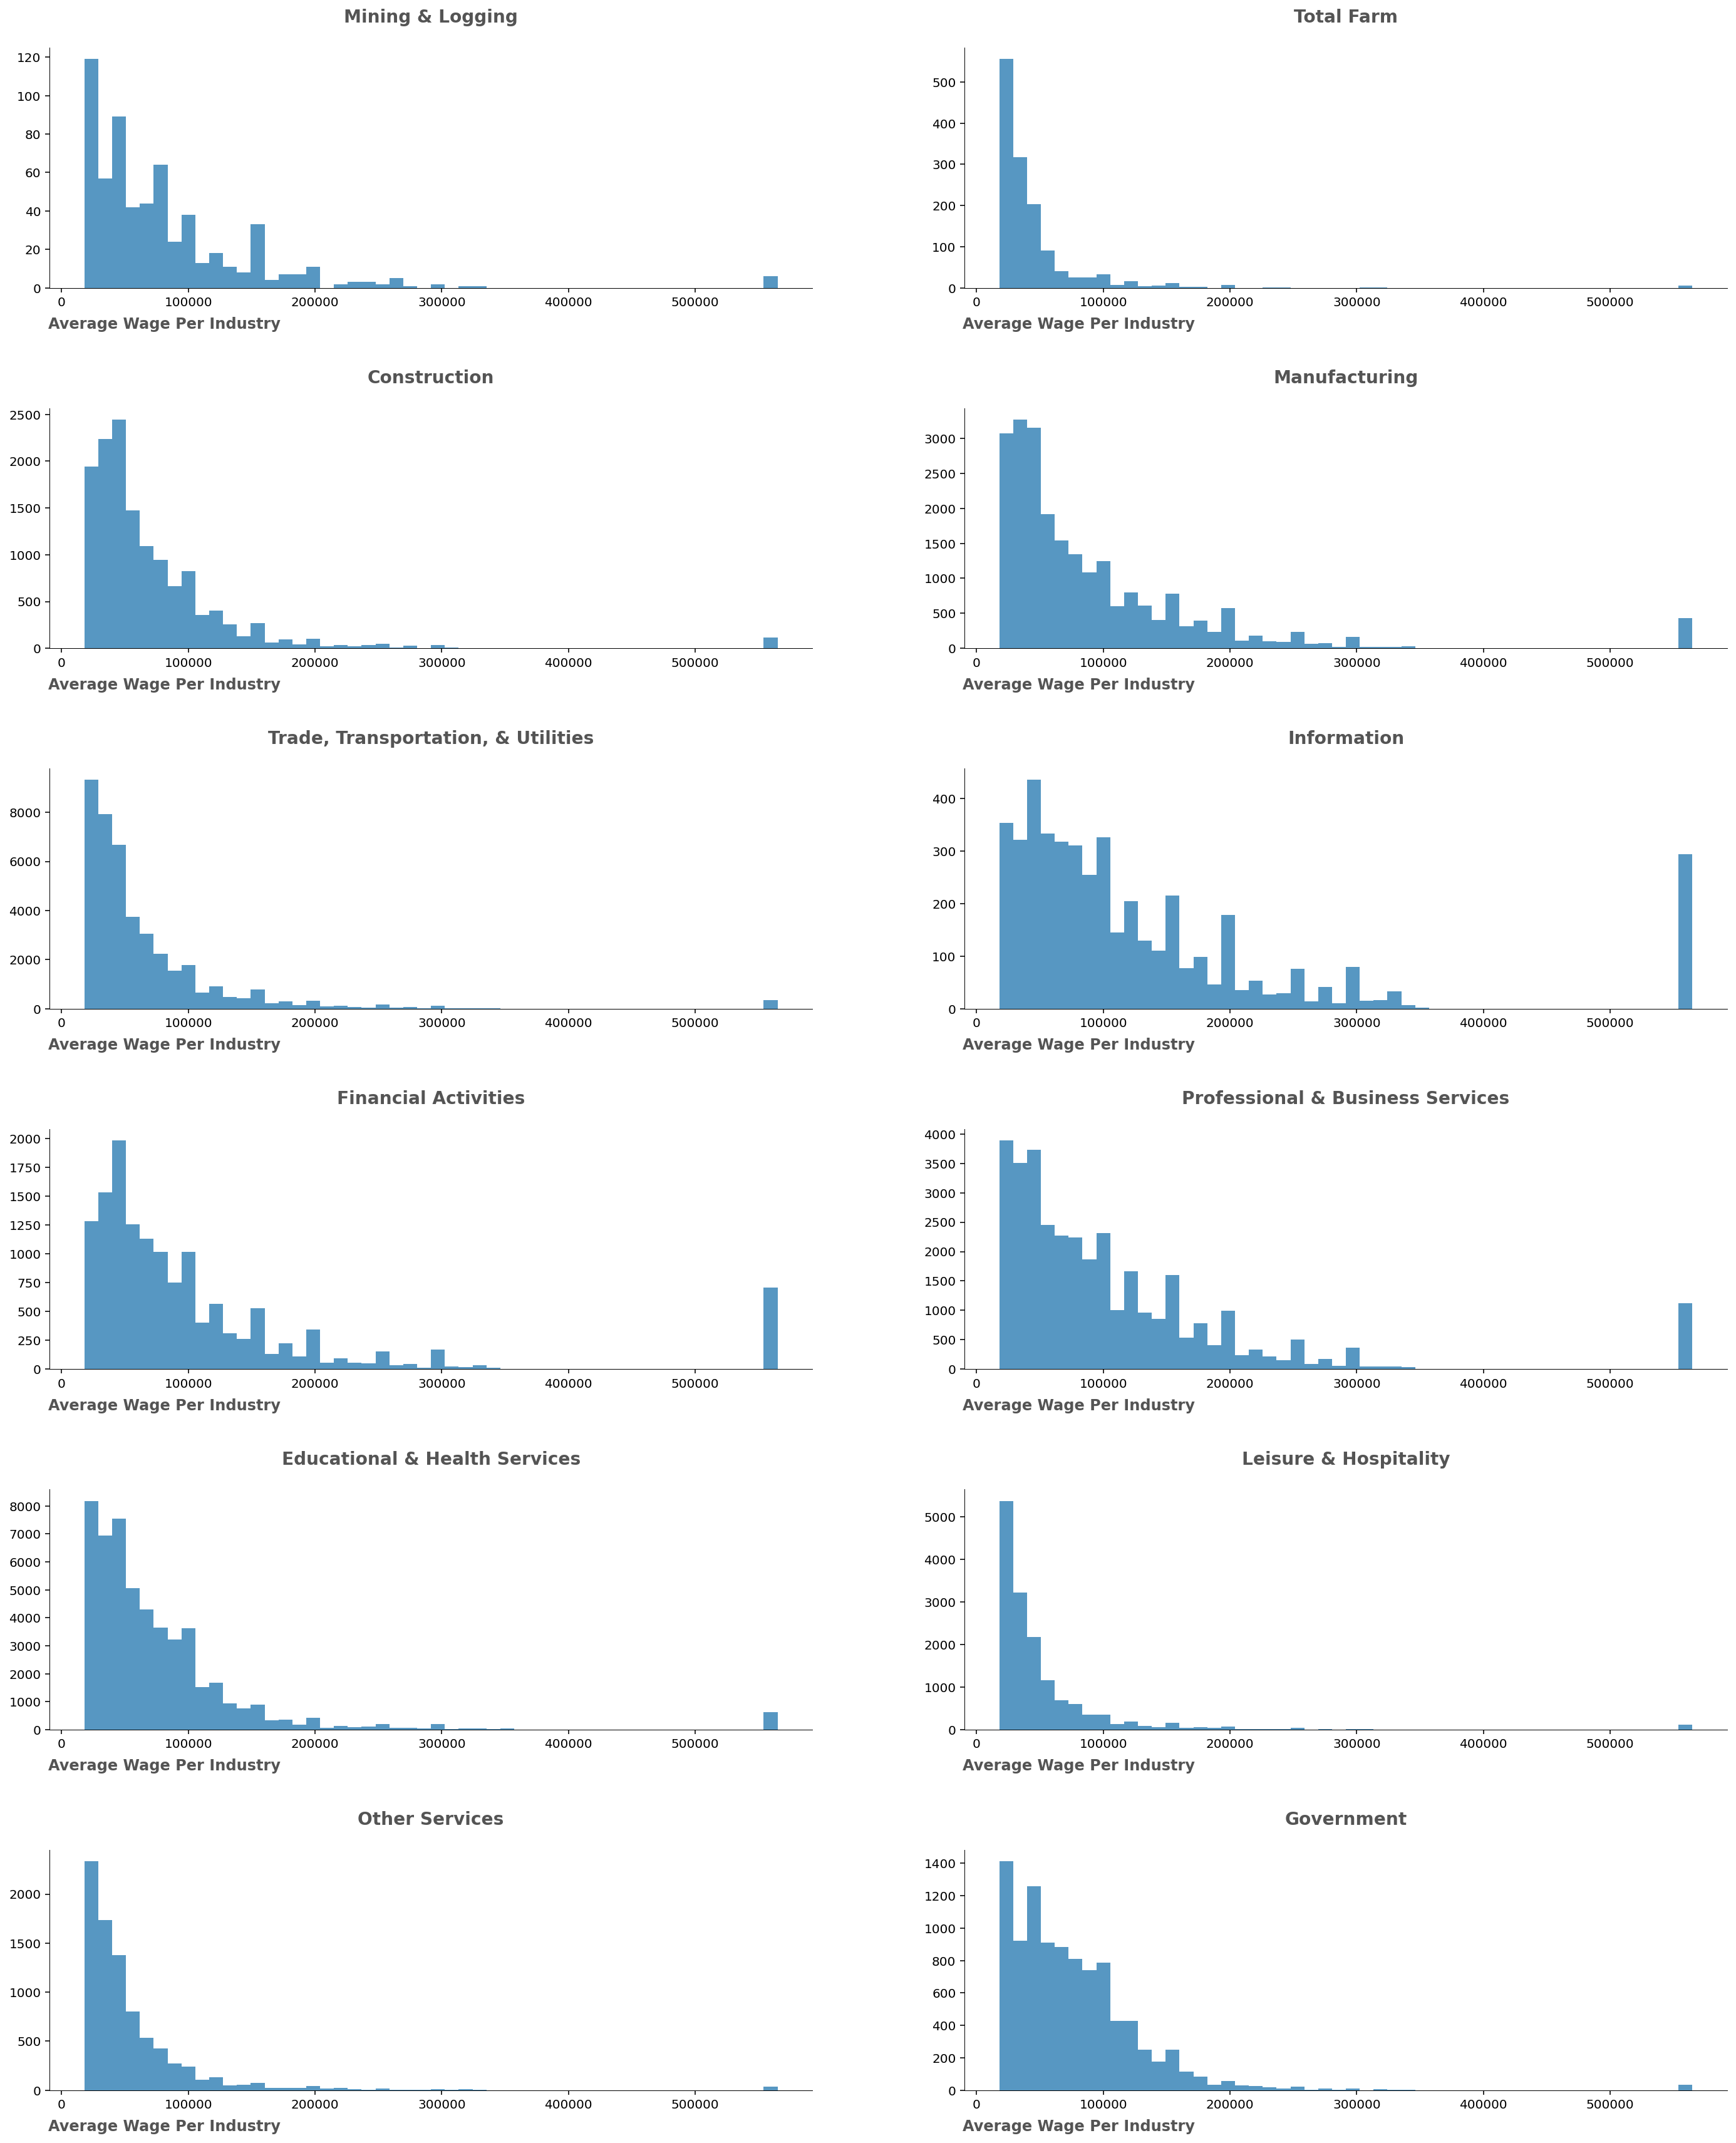

In [89]:
plot_hist(main_ind_dfs, main_ind_titles)

In [91]:
ca_ipums_wages_regions = ca_ipums_wages_regions.sort_values('INCWAGE')
ca_ipums_wages_regions

,YEAR,COUNTYFIP,PERWT,INCWAGE,Crosswalk Value
CERF Regions,,,,,
Kern,2020.0,29.000000,171.428016,58262.716661,18.761585
Northern San Joaquin,2020.0,79.124011,145.437779,61551.086175,18.090059
Central San Joaquin,2020.0,42.568750,149.260795,61623.167614,19.756534
Inland Empire,2020.0,67.699233,151.306071,61840.348170,19.352269
Redwood Coast,2020.0,23.000000,120.370052,63490.017212,20.791738
North State,2020.0,47.327869,119.219461,64790.163934,20.630354
Los Angeles,2020.0,37.000000,125.805076,72805.294679,20.250648
Sacramento,2020.0,65.939186,133.287931,76489.053485,21.459613
San Diego-Imperial,2020.0,71.800528,144.135018,76549.196389,20.857827


In [92]:
total_weight = ca_ipums['PERWT'].sum()
total_weight

28990431.0

In [93]:
wages_summed = (ca_ipums['INCWAGE'] * ca_ipums['PERWT']).sum()
wages_summed

2221649535700.0

In [94]:
avg_wage = wages_summed / total_weight
avg_wage

76633.89122086526

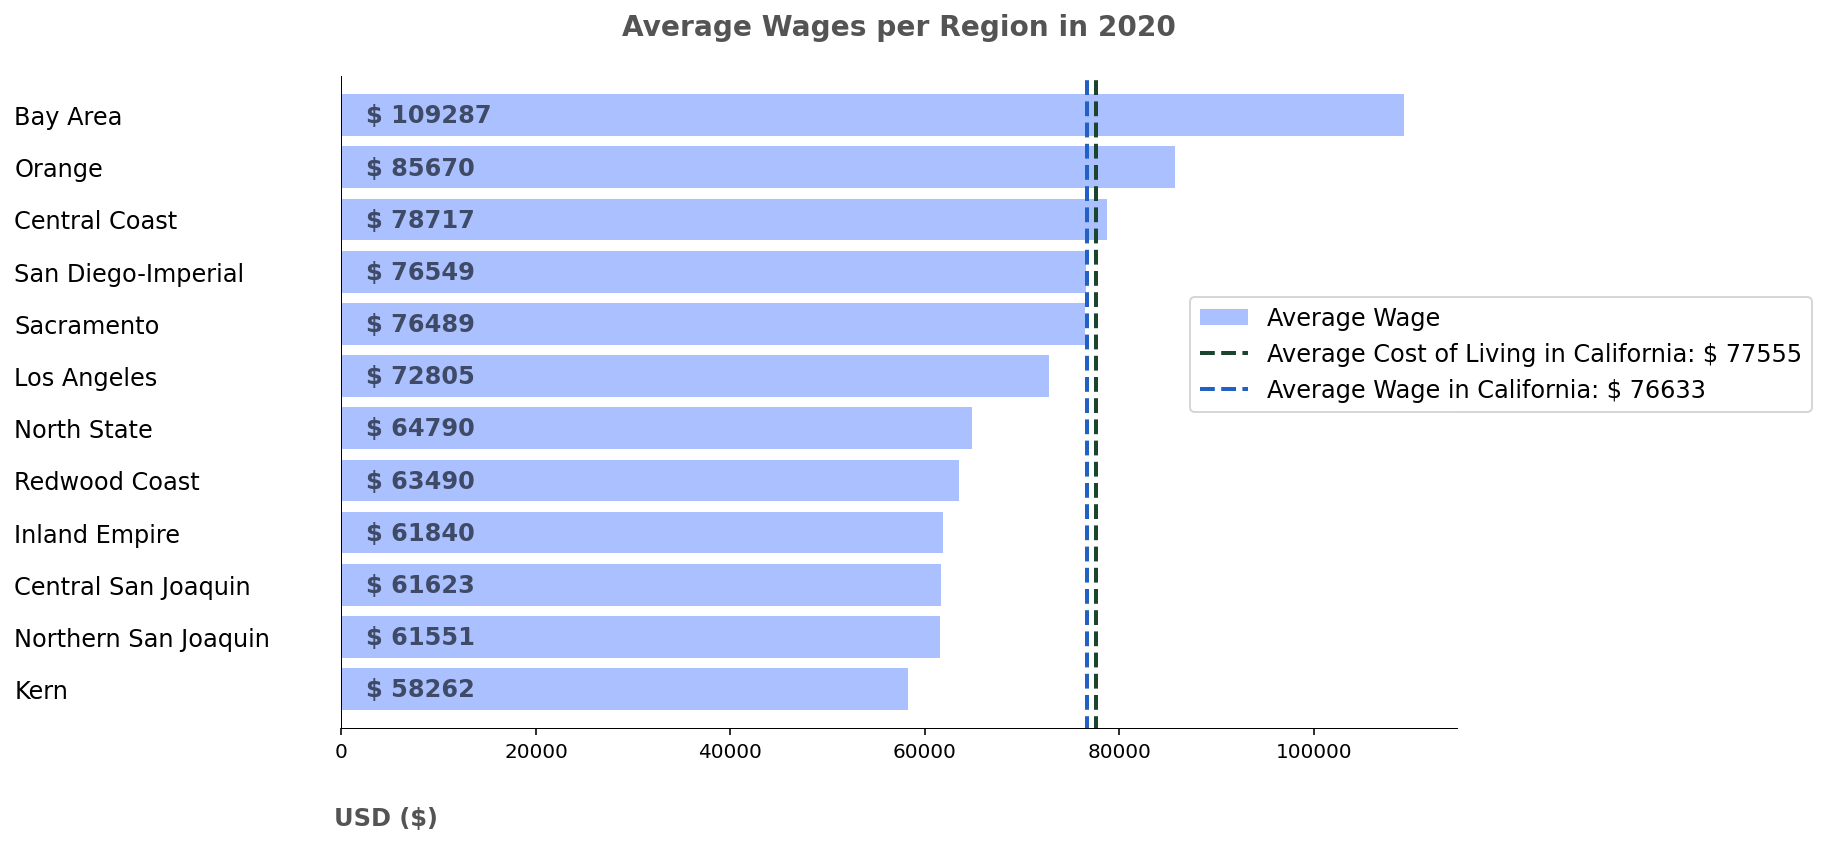

In [103]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(12), ca_ipums_wages_regions['INCWAGE'].values, color='#abc0ff', label="Average Wage")

ax.set_yticks(np.arange(12))
ax.set_yticklabels(ca_ipums_wages_regions.index, fontsize = 12, ha='left')
ax.tick_params(axis='y',direction='out', pad=160, left=False)

ax.set_xlabel("USD ($)", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.04, -0.12)

ca_col = cost_of_living['Cost of Living'][13]

ax.vlines(x=avg_wage, ymin=-0.8, ymax=12, 
          color='#2160c4', lw=2, ls='dashed', label=f'Average Wage in California: $ {int(avg_wage)}')
ax.vlines(x=ca_col, ymin=-0.8, ymax=12, 
          color='#1b452f', lw=2, ls='dashed', label=f'Average Cost of Living in California: $ {ca_col}')
ax.set_ylim(-0.75, 11.75)

ax.set_title('Average Wages per Region in 2020', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[0])}", (2500, -0.15), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[1])}", (2500, 0.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[2])}", (2500, 1.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[3])}", (2500, 2.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[4])}", (2500, 3.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[5])}", (2500, 4.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[6])}", (2500, 5.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[7])}", (2500, 6.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[8])}", (2500, 7.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[9])}", (2500, 8.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[10])}", (2500, 9.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[11])}", (2500, 10.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.75, 0.68), loc='upper left', fontsize=12)
plt.show()

In [108]:
col_regions = cost_of_living[0:13].groupby('Regions').mean().sort_values('Cost of Living')
col_regions

,Cost of Living
Regions,
Kern,54862
Central San Joaquin,56000
Northern San Joaquin,57805
North State,58128
Redwood Coast,58613
Eastern Sierra,61261
Sacramento,63097
Inland Empire,63149
San Diego-Imperial,77956


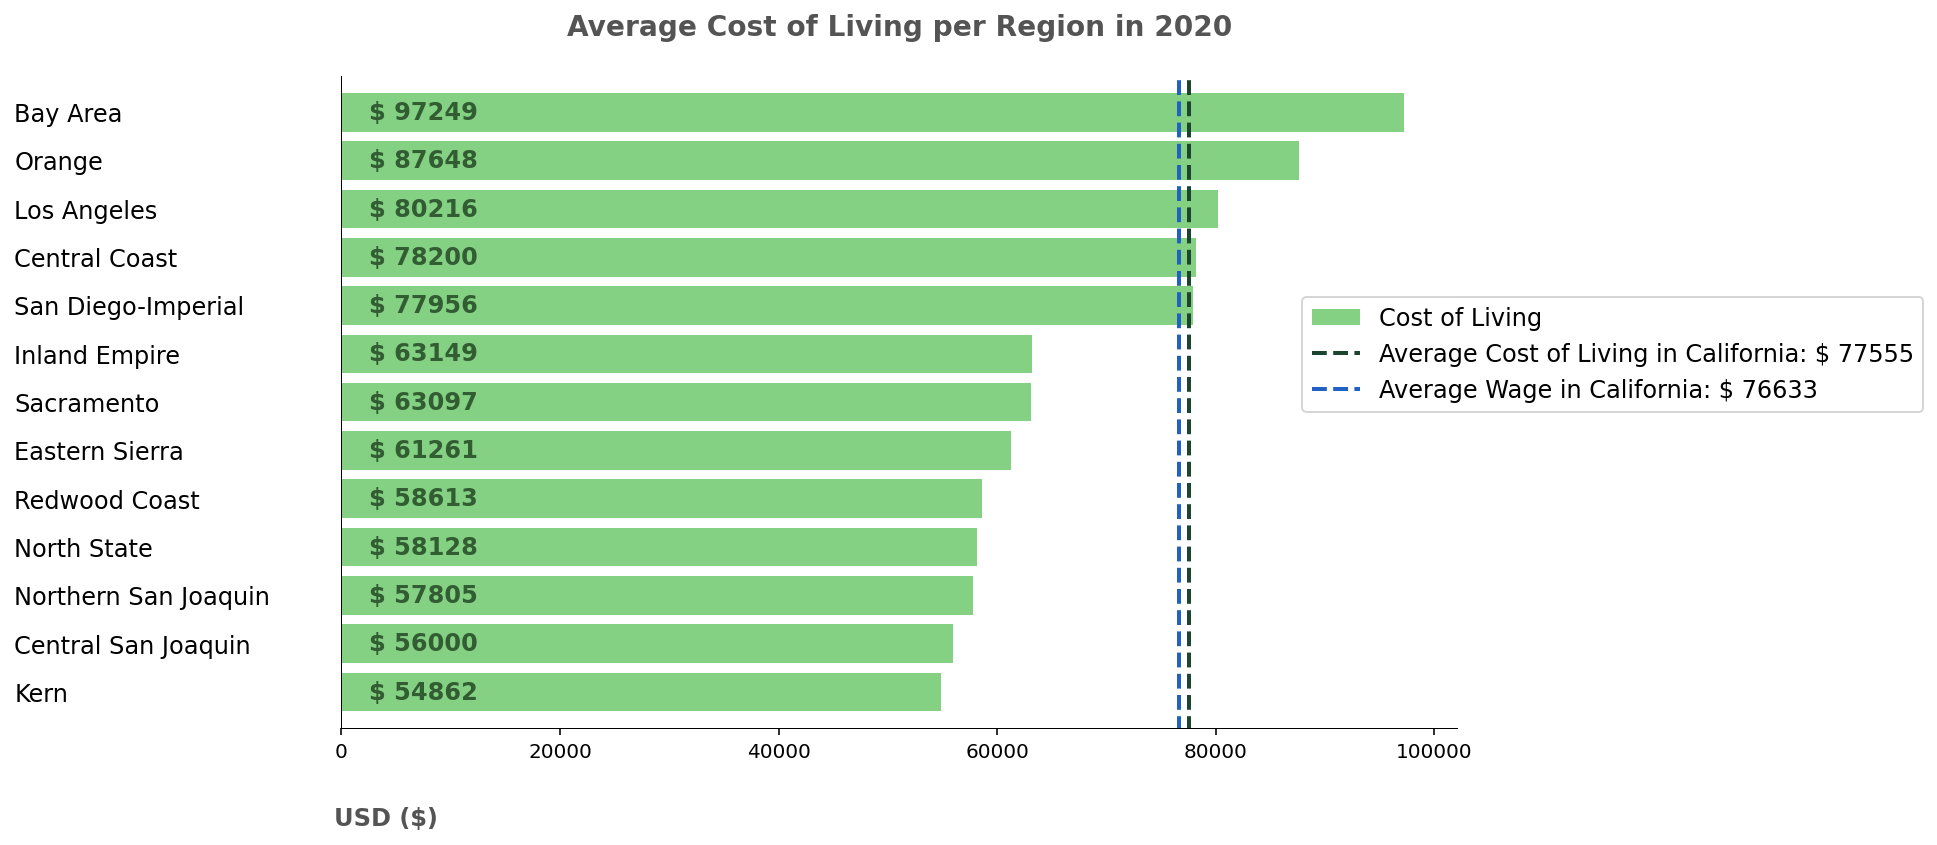

In [110]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(13), col_regions['Cost of Living'].values, color='#85d184', label="Cost of Living")

ax.set_yticks(np.arange(13))
ax.set_yticklabels(col_regions.index, fontsize = 12, ha='left')
ax.tick_params(axis='y',direction='out', pad=160, left=False)

ax.set_xlabel("USD ($)", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.04, -0.12)

ca_col = cost_of_living['Cost of Living'][13]

ax.vlines(x=avg_wage, ymin=-0.8, ymax=13, 
          color='#2160c4', lw=2, ls='dashed', label=f'Average Wage in California: $ {int(avg_wage)}')
ax.vlines(x=ca_col, ymin=-0.8, ymax=13, 
          color='#1b452f', lw=2, ls='dashed', label=f'Average Cost of Living in California: $ {ca_col}')
ax.set_ylim(-0.75, 12.75)

ax.set_title('Average Cost of Living per Region in 2020', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"$ {int(col_regions['Cost of Living'].values[0])}", (2500, -0.15), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[1])}", (2500, 0.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[2])}", (2500, 1.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[3])}", (2500, 2.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[4])}", (2500, 3.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[5])}", (2500, 4.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[6])}", (2500, 5.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[7])}", (2500, 6.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[8])}", (2500, 7.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[9])}", (2500, 8.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[10])}", (2500, 9.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[11])}", (2500, 10.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"$ {int(col_regions['Cost of Living'].values[12])}", (2500, 11.85), size=12, weight='bold', color='#325c32', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.85, 0.68), loc='upper left', fontsize=12)
plt.show()

### High wage count in CA over 2020

In [111]:
hw_state = data.groupby(by=["Date"]).sum()
hw_state['Percentage'] = (hw_state['High Wage Count'] / hw_state['Employment Count']) * 100
hw_state

,High Wage Count,Employment Count,Cost of Living,Percentage
Date,,,,
2020-01-01,5173898,16872900.0,15808010,30.663952
2020-02-01,5216342,16989300.0,15808010,30.703690
2020-03-01,5179494,16816200.0,15808010,30.800621
2020-04-01,4634509,14421300.0,15808010,32.136555
2020-05-01,4698812,14711100.0,15808010,31.940589
2020-06-01,4788509,15176000.0,15808010,31.553169
2020-07-01,4753524,15070500.0,15808010,31.541913
2020-08-01,4802568,15196600.0,15808010,31.602911
2020-09-01,4827846,15326100.0,15808010,31.500812


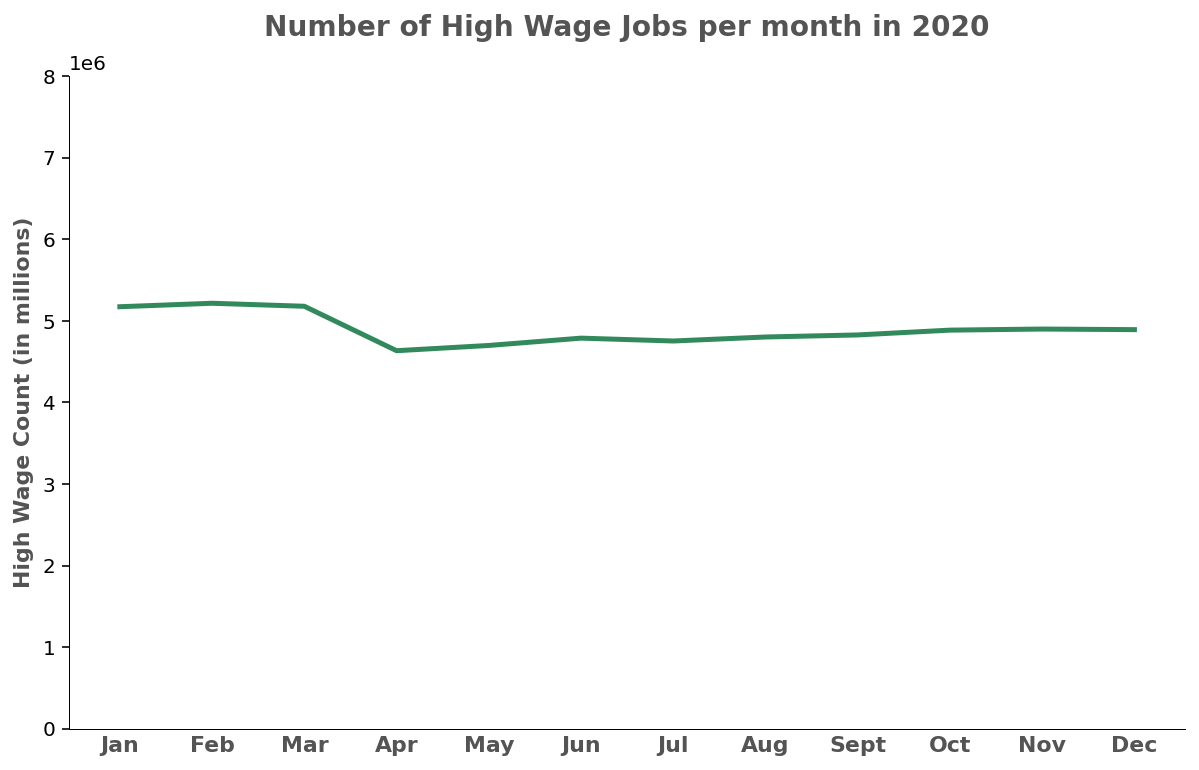

In [112]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['High Wage Count'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Number of High Wage Jobs per month in 2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count (in millions)', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0,8e+6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

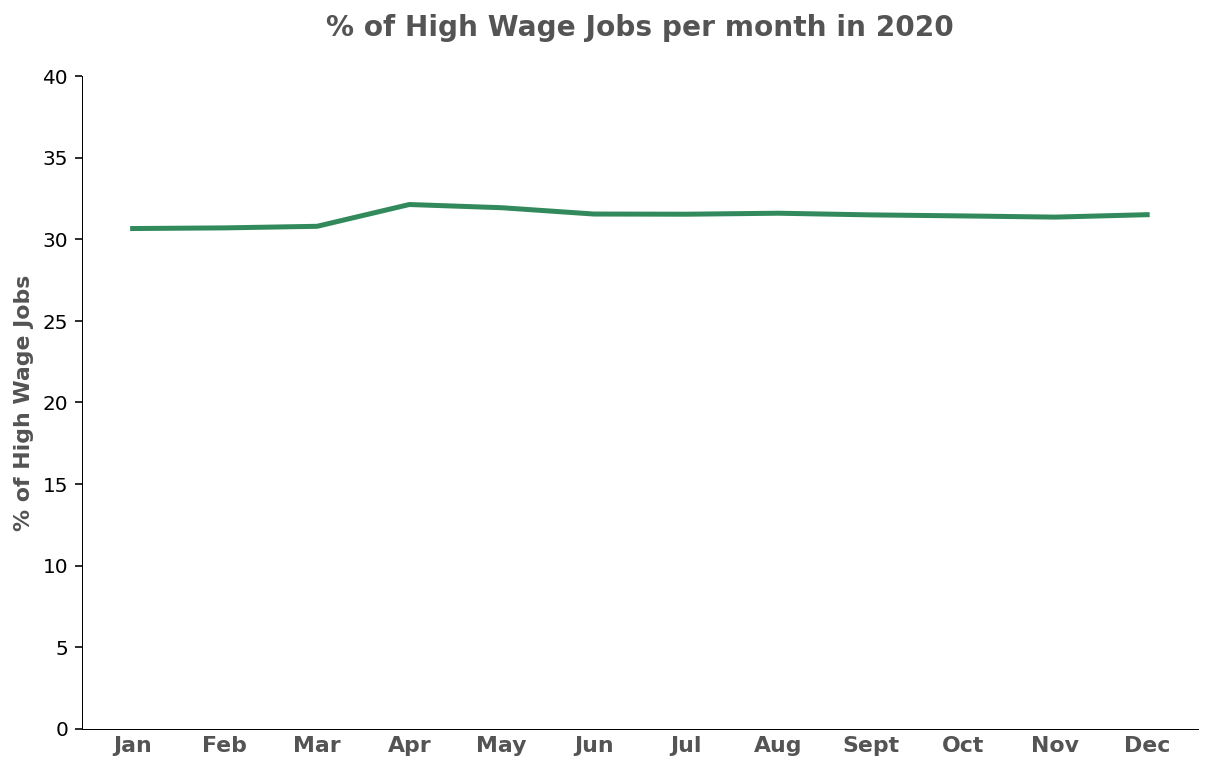

In [113]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['Percentage'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('% of High Wage Jobs per month in 2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0, 40)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

### Industries with most and least high wage jobs in the state

In [114]:
hw_state_industry = data.groupby(by=["Industry"]).mean().sort_values(by='High Wage Count')
hw_state_industry_cut = hw_state_industry.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]
hw_state_industry_cut

,High Wage Count,Employment Count,Cost of Living
Industry,,,
warehousing and storage,36.000000,2158.333333,77956.000000
mining and logging,388.704545,1383.333333,70435.909091
personal and laundry services,2499.833333,39550.000000,80216.000000
repair and maintenance,2790.166667,33483.333333,80216.000000
total farm,3772.645833,27667.361111,69410.250000
local government,47129.173611,135536.111111,69410.250000
manufacturing,53144.062500,111793.750000,69069.750000
educational and health services,56733.916667,164154.166667,68381.000000
health care and social assistance,80730.645833,290412.500000,71468.750000


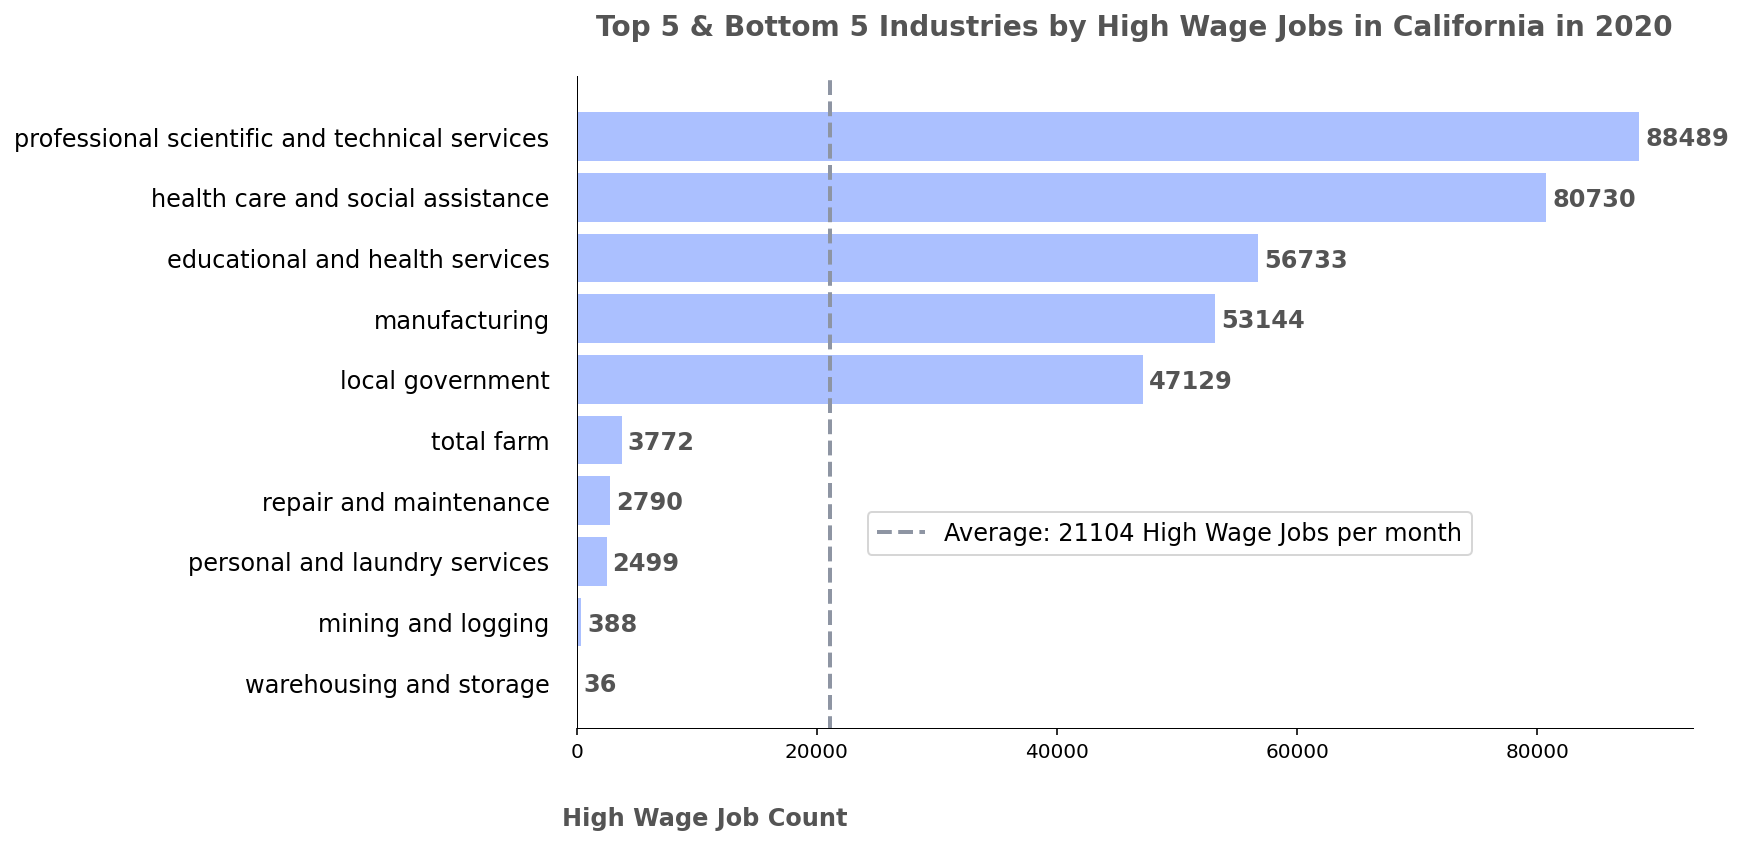

In [123]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_state_industry_cut['High Wage Count'].values, color='#abc0ff')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_state_industry_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = int(hw_state_industry['High Wage Count'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 Industries by High Wage Jobs in California in 2020', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[0])}", 
            (int(hw_state_industry_cut['High Wage Count'].values[0])+500, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[1])}", 
            (int(hw_state_industry_cut['High Wage Count'].values[1])+500, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[2])}", 
            (int(hw_state_industry_cut['High Wage Count'].values[2])+500, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[3])}", 
            (int(hw_state_industry_cut['High Wage Count'].values[3])+500, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[4])}", 
            (int(hw_state_industry_cut['High Wage Count'].values[4])+500, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[5])}", 
            (int(hw_state_industry_cut['High Wage Count'].values[5])+500, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[6])}", 
            (int(hw_state_industry_cut['High Wage Count'].values[6])+500, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[7])}", 
            (int(hw_state_industry_cut['High Wage Count'].values[7])+500, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[8])}", 
            (int(hw_state_industry_cut['High Wage Count'].values[8])+500, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[9])}", 
            (int(hw_state_industry_cut['High Wage Count'].values[9])+500, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.25, 0.35), loc='upper left', fontsize=12)
plt.show()

### Average high wage count in 2020 per region

In [124]:
hw_regions = data.groupby(by=["Region", "Date"]).sum().groupby(by=['Region']).mean().sort_values(by='High Wage Count')
hw_regions['Percentage'] = (hw_regions['High Wage Count'] / hw_regions['Employment Count']) * 100
hw_regions

,High Wage Count,Employment Count,Cost of Living,Percentage
Region,,,,
Redwood Coast,1.572767e+04,4.761667e+04,879195.0,33.029751
North State,4.693725e+04,1.426250e+05,871920.0,32.909553
Kern,1.234341e+05,3.422750e+05,1261826.0,36.062839
Northern San Joaquin,1.788113e+05,5.354500e+05,982685.0,33.394590
Central San Joaquin,2.357586e+05,6.560500e+05,1008000.0,35.936069
Central Coast,2.360388e+05,7.246750e+05,1329400.0,32.571670
Inland Empire,4.084457e+05,1.492417e+06,1262980.0,27.368072
Sacramento,4.168432e+05,9.779583e+05,883358.0,42.623825
Orange,4.376303e+05,1.526550e+06,2015904.0,28.667933


In [125]:
hw_regions_perc_sorted = hw_regions.sort_values(by='Percentage')
hw_regions_perc_sorted

,High Wage Count,Employment Count,Cost of Living,Percentage
Region,,,,
Los Angeles,1.046788e+06,4.152692e+06,1925184.0,25.207448
Inland Empire,4.084457e+05,1.492417e+06,1262980.0,27.368072
Orange,4.376303e+05,1.526550e+06,2015904.0,28.667933
San Diego-Imperial,4.377584e+05,1.450100e+06,1637076.0,30.188154
Central Coast,2.360388e+05,7.246750e+05,1329400.0,32.571670
North State,4.693725e+04,1.426250e+05,871920.0,32.909553
Redwood Coast,1.572767e+04,4.761667e+04,879195.0,33.029751
Northern San Joaquin,1.788113e+05,5.354500e+05,982685.0,33.394590
Central San Joaquin,2.357586e+05,6.560500e+05,1008000.0,35.936069


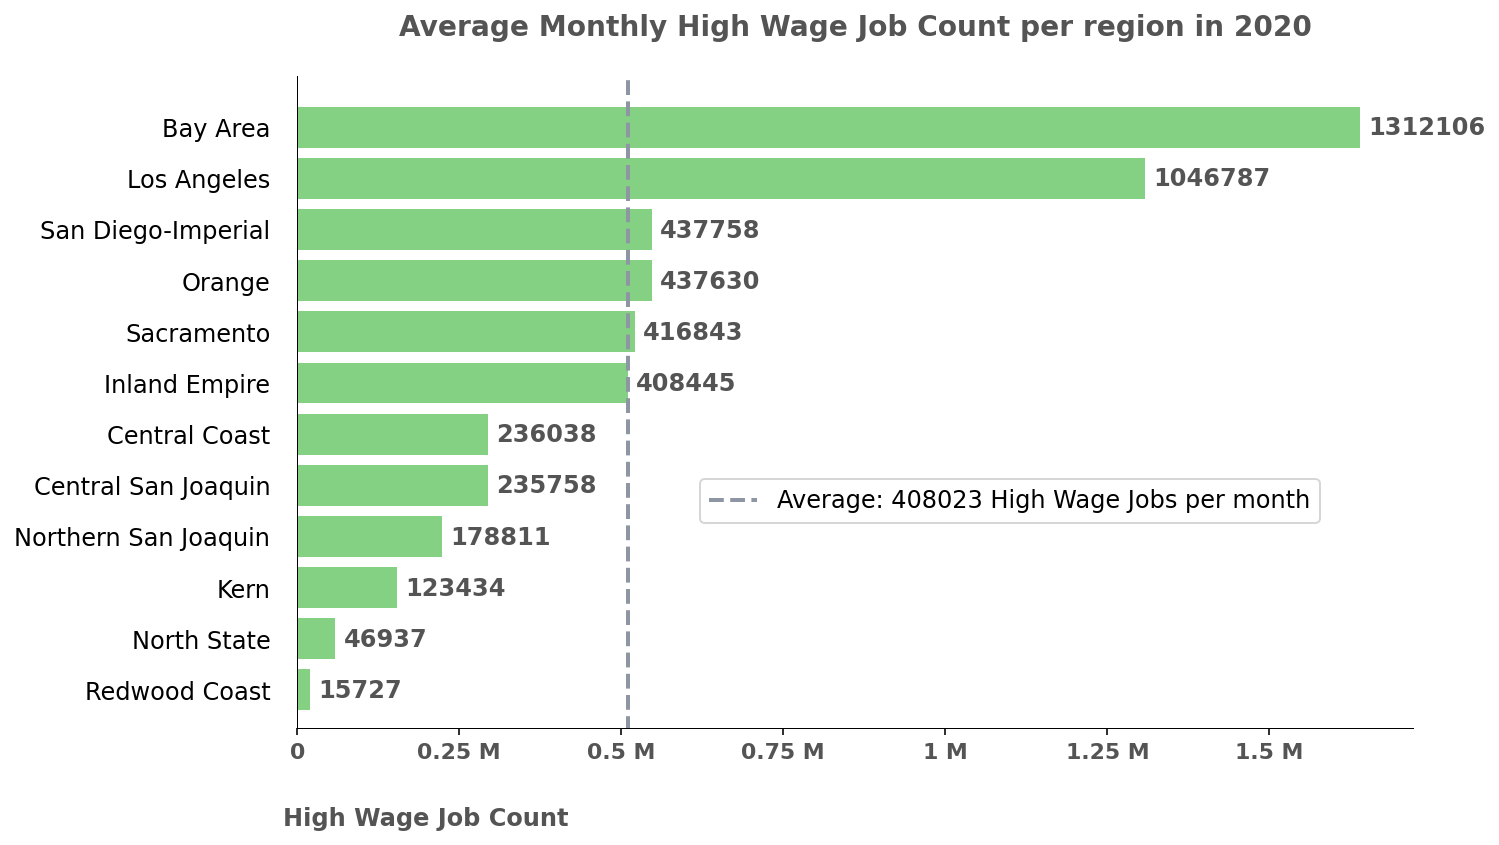

In [130]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(12), hw_regions['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(12))
ax.set_yticklabels(hw_regions.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.set_xticklabels(['0', '0.25 M','0.5 M','0.75 M','1 M','1.25 M','1.5 M','1.75 M'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = int(hw_regions['High Wage Count'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=12, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per month')
ax.set_ylim(-0.75, 12)

ax.set_title('Average Monthly High Wage Job Count per region in 2020', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{int(hw_regions['High Wage Count'].values[0])}", 
            (int(hw_regions['High Wage Count'].values[0])+10000, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[1])}", 
            (int(hw_regions['High Wage Count'].values[1])+10000, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[2])}", 
            (int(hw_regions['High Wage Count'].values[2])+10000, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[3])}", 
            (int(hw_regions['High Wage Count'].values[3])+10000, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[4])}", 
            (int(hw_regions['High Wage Count'].values[4])+10000, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[5])}", 
            (int(hw_regions['High Wage Count'].values[5])+10000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[6])}", 
            (int(hw_regions['High Wage Count'].values[6])+10000, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[7])}", 
            (int(hw_regions['High Wage Count'].values[7])+10000, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[8])}", 
            (int(hw_regions['High Wage Count'].values[8])+10000, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[9])}", 
            (int(hw_regions['High Wage Count'].values[9])+10000, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[10])}", 
            (int(hw_regions['High Wage Count'].values[10])+10000, 9.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[11])}", 
            (int(hw_regions['High Wage Count'].values[11])+10000, 10.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.35, 0.4), loc='upper left', fontsize=12)
plt.show()

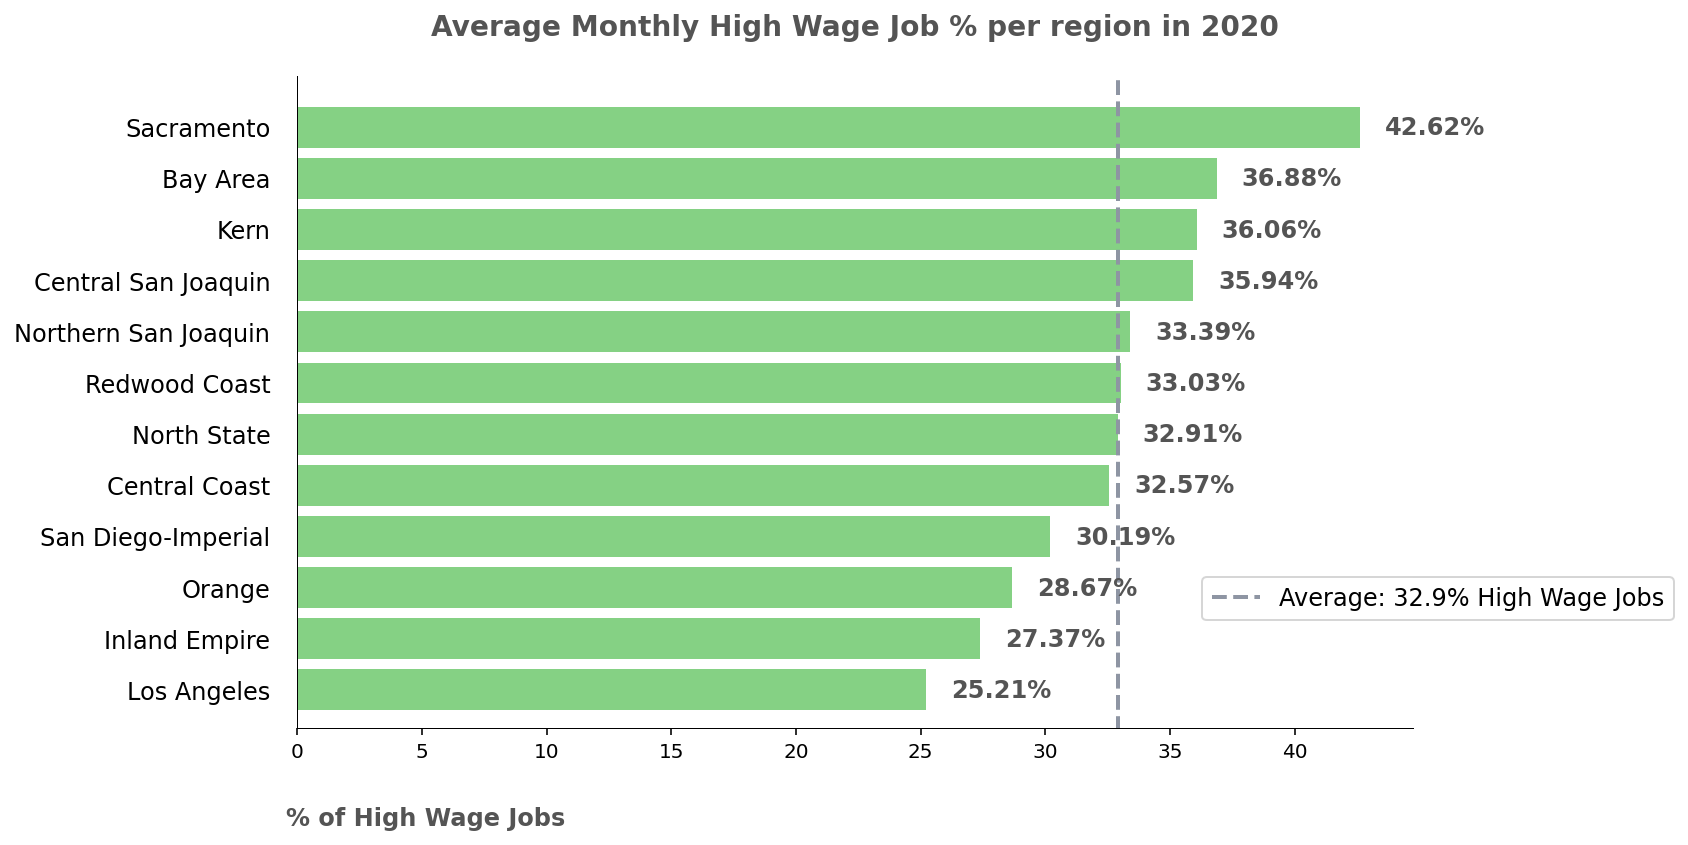

In [193]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(12), hw_regions_perc_sorted['Percentage'].values, color='#85d184')

ax.set_yticks(np.arange(12))
ax.set_yticklabels(hw_regions_perc_sorted.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("% of High Wage Jobs", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = round(hw_regions_perc_sorted['Percentage'].values.mean(), 2)

ax.vlines(x=mean_val, ymin=-0.8, ymax=12, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val}% High Wage Jobs')
ax.set_ylim(-0.75, 12)

ax.set_title('Average Monthly High Wage Job % per region in 2020', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[0], 2)}%", 
            (hw_regions_perc_sorted['Percentage'].values[0]+1, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[1], 2)}%", 
            (hw_regions_perc_sorted['Percentage'].values[1]+1, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[2], 2)}%", 
            (hw_regions_perc_sorted['Percentage'].values[2]+1, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[3], 2)}%", 
            (hw_regions_perc_sorted['Percentage'].values[3]+1, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[4], 2)}%", 
            (hw_regions_perc_sorted['Percentage'].values[4]+1, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[5], 2)}%", 
            (hw_regions_perc_sorted['Percentage'].values[5]+1, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[6], 2)}%", 
            (hw_regions_perc_sorted['Percentage'].values[6]+1, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[7], 2)}%", 
            (hw_regions_perc_sorted['Percentage'].values[7]+1, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[8], 2)}%", 
            (hw_regions_perc_sorted['Percentage'].values[8]+1, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[9], 2)}%", 
            (hw_regions_perc_sorted['Percentage'].values[9]+1, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[10], 2)}%", 
            (hw_regions_perc_sorted['Percentage'].values[10]+1, 9.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[11], 2)}%", 
            (hw_regions_perc_sorted['Percentage'].values[11]+1, 10.85), size=12, weight='bold', color='#545454', annotation_clip=False)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.8, 0.25), loc='upper left', fontsize=12)
plt.show()

In [135]:
kern_data = data.loc[data['Region'] == 'Kern']
csj_data = data.loc[data['Region'] == 'Central San Joaquin']
nsj_data = data.loc[data['Region'] == 'Northern San Joaquin']
ns_data = data.loc[data['Region'] == 'North State']
rc_data = data.loc[data['Region'] == 'Redwood Coast']
sd_data = data.loc[data['Region'] == 'San Diego-Imperial']
orange_data = data.loc[data['Region'] == 'Orange']
ie_data = data.loc[data['Region'] == 'Inland Empire']
cc_data = data.loc[data['Region'] == 'Central Coast']
bay_data = data.loc[data['Region'] == 'Bay Area']
sac_data = data.loc[data['Region'] == 'Sacramento']
la_data = data.loc[data['Region'] == 'Los Angeles']

In [136]:
hw_kern = kern_data.groupby(by=["Date"]).sum()
hw_kern['Percentage'] = (hw_kern['High Wage Count'] / hw_kern['Employment Count']) * 100
hw_csj = csj_data.groupby(by=["Date"]).sum()
hw_csj['Percentage'] = (hw_csj['High Wage Count'] / hw_csj['Employment Count']) * 100
hw_nsj = nsj_data.groupby(by=["Date"]).sum()
hw_nsj['Percentage'] = (hw_nsj['High Wage Count'] / hw_nsj['Employment Count']) * 100
hw_ns = ns_data.groupby(by=["Date"]).sum()
hw_ns['Percentage'] = (hw_ns['High Wage Count'] / hw_ns['Employment Count']) * 100
hw_rc = rc_data.groupby(by=["Date"]).sum()
hw_rc['Percentage'] = (hw_rc['High Wage Count'] / hw_rc['Employment Count']) * 100
hw_sd = sd_data.groupby(by=["Date"]).sum()
hw_sd['Percentage'] = (hw_sd['High Wage Count'] / hw_sd['Employment Count']) * 100
hw_orange = orange_data.groupby(by=["Date"]).sum()
hw_orange['Percentage'] = (hw_orange['High Wage Count'] / hw_orange['Employment Count']) * 100
hw_ie = ie_data.groupby(by=["Date"]).sum()
hw_ie['Percentage'] = (hw_ie['High Wage Count'] / hw_ie['Employment Count']) * 100
hw_cc = cc_data.groupby(by=["Date"]).sum()
hw_cc['Percentage'] = (hw_cc['High Wage Count'] / hw_cc['Employment Count']) * 100
hw_bay = bay_data.groupby(by=["Date"]).sum()
hw_bay['Percentage'] = (hw_bay['High Wage Count'] / hw_bay['Employment Count']) * 100
hw_sac = sac_data.groupby(by=["Date"]).sum()
hw_sac['Percentage'] = (hw_sac['High Wage Count'] / hw_sac['Employment Count']) * 100
hw_la = la_data.groupby(by=["Date"]).sum()
hw_la['Percentage'] = (hw_la['High Wage Count'] / hw_la['Employment Count']) * 100

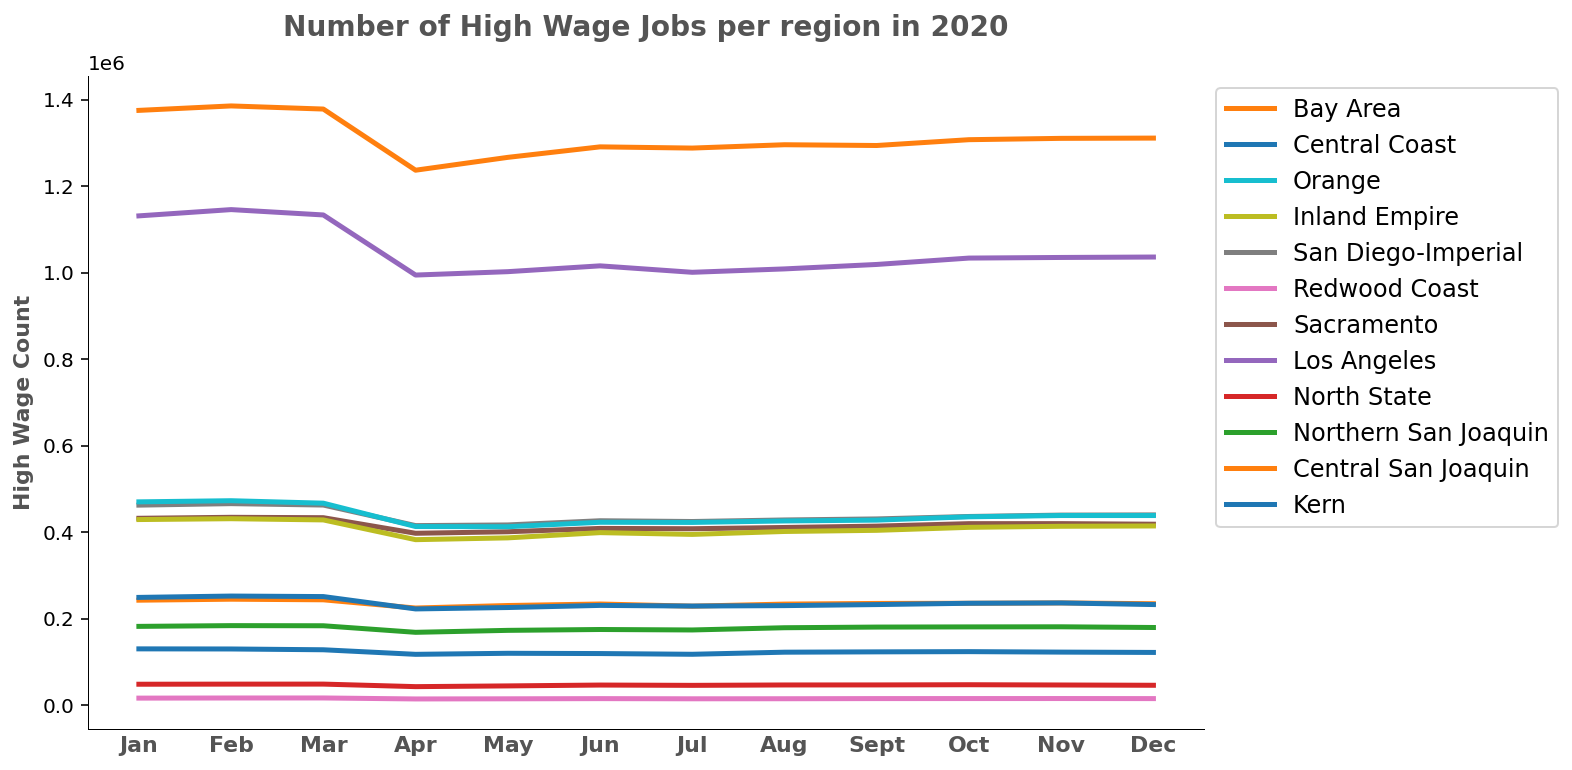

In [137]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_kern['High Wage Count'].values, lw=2.5, label='Kern')
ax.plot(hw_csj['High Wage Count'].values, lw=2.5, label='Central San Joaquin')
ax.plot(hw_nsj['High Wage Count'].values, lw=2.5, label='Northern San Joaquin')
ax.plot(hw_ns['High Wage Count'].values, lw=2.5, label='North State')
ax.plot(hw_la['High Wage Count'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['High Wage Count'].values, lw=2.5, label='Sacramento')
ax.plot(hw_rc['High Wage Count'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['High Wage Count'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['High Wage Count'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['High Wage Count'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['High Wage Count'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['High Wage Count'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Number of High Wage Jobs per region in 2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

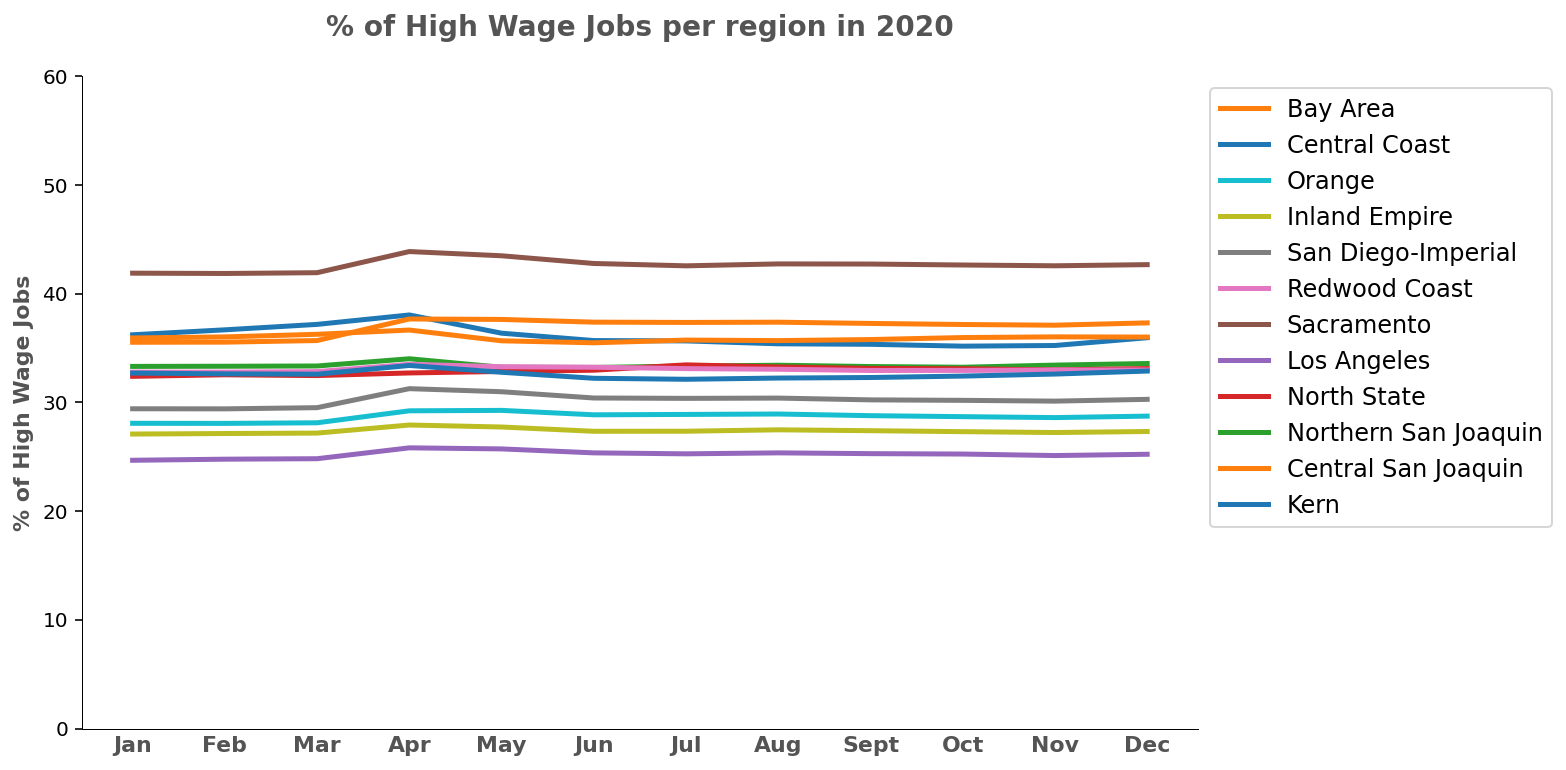

In [138]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_kern['Percentage'].values, lw=2.5, label='Kern')
ax.plot(hw_csj['Percentage'].values, lw=2.5, label='Central San Joaquin')
ax.plot(hw_nsj['Percentage'].values, lw=2.5, label='Northern San Joaquin')
ax.plot(hw_ns['Percentage'].values, lw=2.5, label='North State')
ax.plot(hw_la['Percentage'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['Percentage'].values, lw=2.5, label='Sacramento')
ax.plot(hw_rc['Percentage'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['Percentage'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['Percentage'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['Percentage'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['Percentage'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['Percentage'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('% of High Wage Jobs per region in 2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0, 60)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

### Tree Plot

In [139]:
hw_regions = hw_regions.sort_values('High Wage Count', ascending=False)
hw_regions

,High Wage Count,Employment Count,Cost of Living,Percentage
Region,,,,
Bay Area,1.312106e+06,3.557792e+06,1750482.0,36.879797
Los Angeles,1.046788e+06,4.152692e+06,1925184.0,25.207448
San Diego-Imperial,4.377584e+05,1.450100e+06,1637076.0,30.188154
Orange,4.376303e+05,1.526550e+06,2015904.0,28.667933
Sacramento,4.168432e+05,9.779583e+05,883358.0,42.623825
Inland Empire,4.084457e+05,1.492417e+06,1262980.0,27.368072
Central Coast,2.360388e+05,7.246750e+05,1329400.0,32.571670
Central San Joaquin,2.357586e+05,6.560500e+05,1008000.0,35.936069
Northern San Joaquin,1.788113e+05,5.354500e+05,982685.0,33.394590


In [140]:
data_dec2020 = data.loc[data['Date'] == '2020-12-01']
data_dec2020['Percentage'] = (data_dec2020['High Wage Count'] / data_dec2020['Employment Count']) * 100
data_dec2020.head()

,Industry,Date,Region,High Wage Count,Employment Count,Cost of Living,Percentage
11,accommodation and food services,2020-12-01,Inland Empire,13694,115300.0,63149,11.876843
23,administrative and support and waste services,2020-12-01,Inland Empire,25917,106500.0,63149,24.335211
35,arts entertainment and recreation,2020-12-01,Inland Empire,2305,11600.0,63149,19.870690
47,construction,2020-12-01,Inland Empire,38777,109500.0,63149,35.412785
59,durable goods,2020-12-01,Inland Empire,18549,56800.0,63149,32.656690


In [141]:
fig = px.treemap(data_dec2020, 
                 path=[px.Constant('California'), 'Region'], 
                 values='High Wage Count',
                )
fig.update_traces(root_color='lightgrey')
fig.show()

### Job Creation Numbers

In [142]:
data.head()

,Industry,Date,Region,High Wage Count,Employment Count,Cost of Living
0,accommodation and food services,2020-01-01,Inland Empire,18315,154200.0,63149
1,accommodation and food services,2020-02-01,Inland Empire,18623,156800.0,63149
2,accommodation and food services,2020-03-01,Inland Empire,18279,153900.0,63149
3,accommodation and food services,2020-04-01,Inland Empire,11354,95600.0,63149
4,accommodation and food services,2020-05-01,Inland Empire,12174,102500.0,63149


In [143]:
data_jobcreation = data.groupby(by=['Region', 'Date']).sum()[['High Wage Count']]
data_jobcreation['Job Creation'] = data_jobcreation['High Wage Count'].diff()
data_jobcreation = data_jobcreation.reset_index()
data_jobcreation = data_jobcreation.loc[data_jobcreation['Date'] != '2020-01-01']
data_jobcreation.head()

,Region,Date,High Wage Count,Job Creation
1,Bay Area,2020-02-01,1385919,10289.0
2,Bay Area,2020-03-01,1378703,-7216.0
3,Bay Area,2020-04-01,1237303,-141400.0
4,Bay Area,2020-05-01,1267004,29701.0
5,Bay Area,2020-06-01,1291278,24274.0


In [145]:
kern_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Kern']
csj_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Central San Joaquin']
nsj_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Northern San Joaquin']
ns_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'North State']
rc_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Redwood Coast']
sd_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'San Diego-Imperial']
orange_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Orange']
ie_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Inland Empire']
cc_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Central Coast']
bay_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Bay Area']
sac_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Sacramento']
la_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Los Angeles']

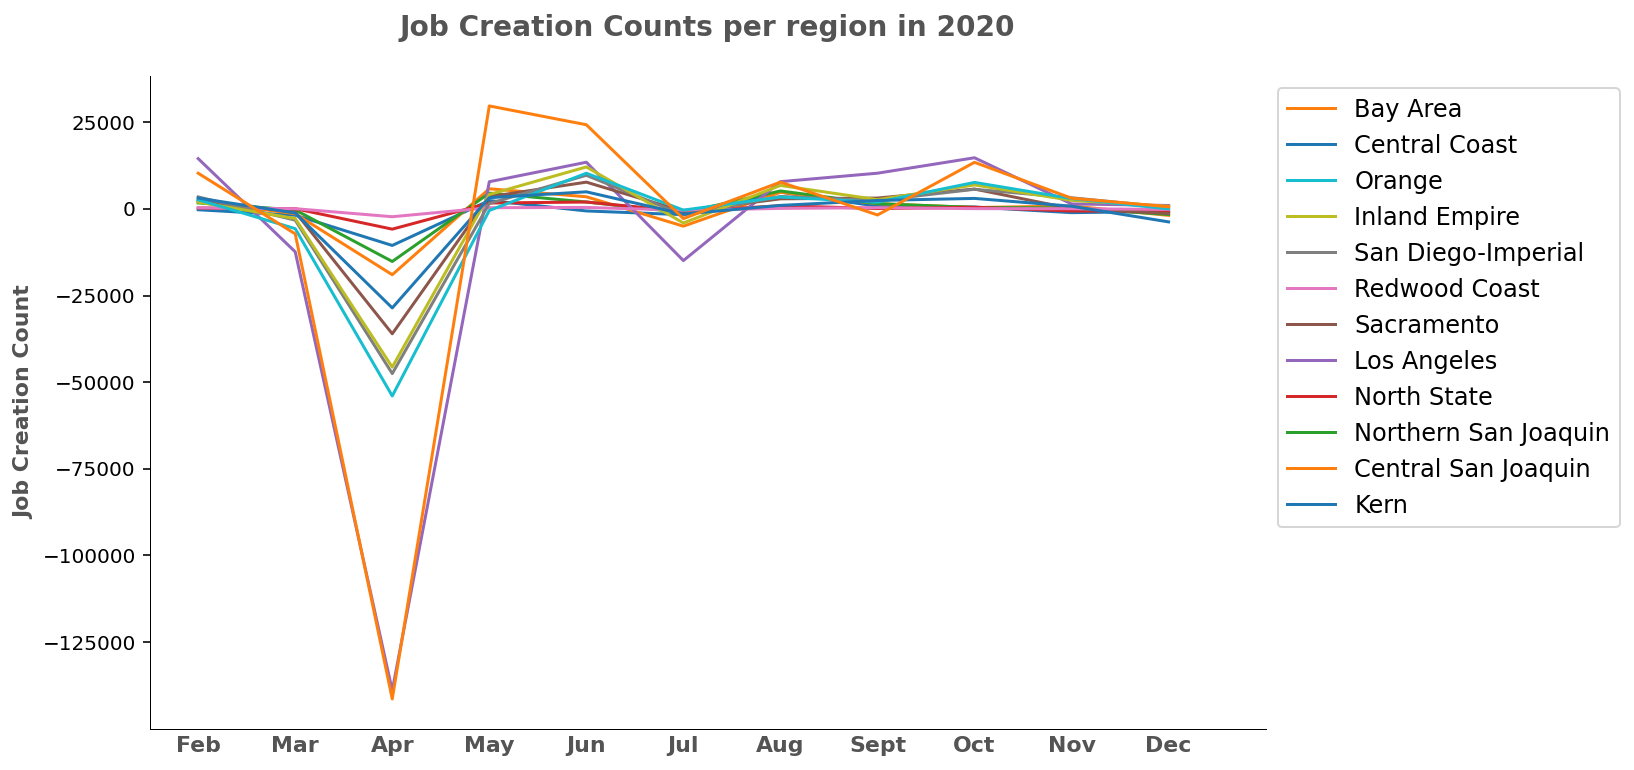

In [146]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(kern_jc['Job Creation'].values, label='Kern')
ax.plot(csj_jc['Job Creation'].values, label='Central San Joaquin')
ax.plot(nsj_jc['Job Creation'].values, label='Northern San Joaquin')
ax.plot(ns_jc['Job Creation'].values, label='North State')
ax.plot(la_jc['Job Creation'].values, label='Los Angeles')
ax.plot(sac_jc['Job Creation'].values, label='Sacramento')
ax.plot(rc_jc['Job Creation'].values, label='Redwood Coast')
ax.plot(sd_jc['Job Creation'].values, label='San Diego-Imperial')
ax.plot(ie_jc['Job Creation'].values, label='Inland Empire')
ax.plot(orange_jc['Job Creation'].values, label='Orange')
ax.plot(cc_jc['Job Creation'].values, label='Central Coast')
ax.plot(bay_jc['Job Creation'].values, label='Bay Area')

ax.set_xticklabels(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Job Creation Counts per region in 2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('Job Creation Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

## Racial demographics breakdown

In [148]:
# do treemap of high wage percentages by race
data_demo = pd.read_csv(f'data/outputs/hw_outputs_w_race_{year}.csv')

In [149]:
data_demo.head()

,Industry,Date,Region,High Wage Count,Employment Count,Cost of Living,Output Race
0,accommodation and food services,2020-01-01,Inland Empire,28069,154200.0,63149,White
1,accommodation and food services,2020-02-01,Inland Empire,28542,156800.0,63149,White
2,accommodation and food services,2020-03-01,Inland Empire,28014,153900.0,63149,White
3,accommodation and food services,2020-04-01,Inland Empire,17402,95600.0,63149,White
4,accommodation and food services,2020-05-01,Inland Empire,18658,102500.0,63149,White


In [161]:
hw_race = data_demo.groupby(by=["Output Race", "Date"]).sum().groupby(by=['Output Race']).mean()
hw_race['Percentage'] = (hw_race['High Wage Count'] / hw_race['Employment Count']) * 100
hw_race = hw_race.sort_values(by='Percentage')

In [162]:
hw_race

,High Wage Count,Employment Count,Cost of Living,Percentage
Output Race,,,,
Latino,2.772040e+06,1.542838e+07,15236351.0,17.967144
American Indian/Alaska Native,1.828782e+06,8.786350e+06,8096635.0,20.813898
Black,3.414721e+06,1.377165e+07,12884901.0,24.795292
Some other race,3.554346e+06,1.059862e+07,8933531.0,33.535944
Multiracial,5.043489e+06,1.466588e+07,14096338.0,34.389262
Asian,5.337901e+06,1.486892e+07,14105128.0,35.899728
White,6.593130e+06,1.554639e+07,15744861.0,42.409393


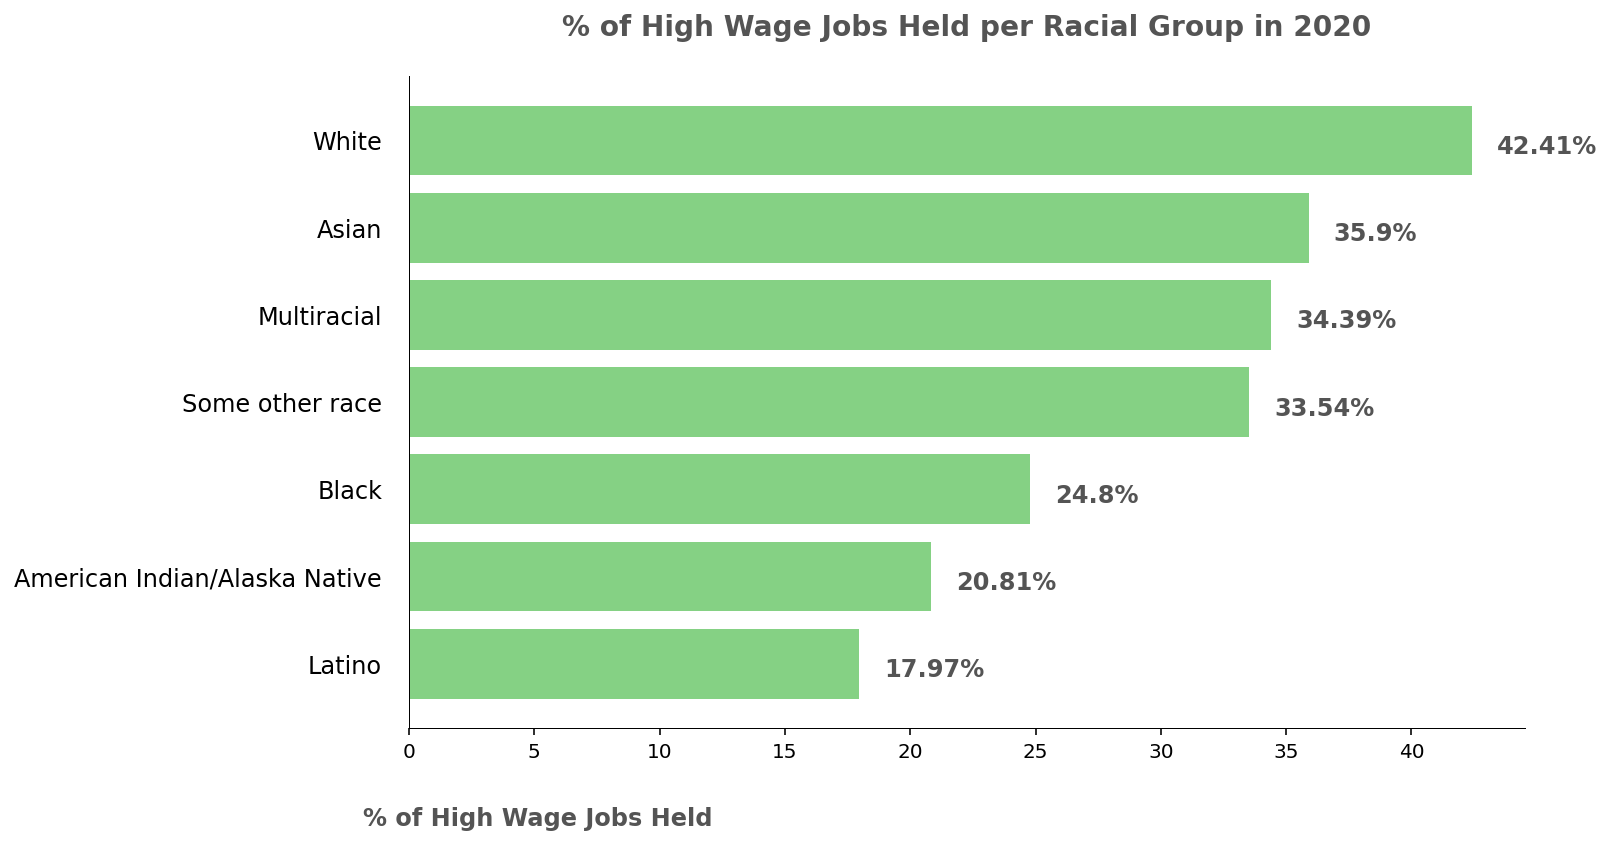

In [163]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(7), hw_race['Percentage'].values, color='#85d184')

ax.set_yticks(np.arange(7))
ax.set_yticklabels(hw_race.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("% of High Wage Jobs Held", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.set_title('% of High Wage Jobs Held per Racial Group in 2020', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{round(hw_race['Percentage'].values[0], 2)}%", 
            (hw_race['Percentage'].values[0]+1, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_race['Percentage'].values[1], 2)}%", 
            (hw_race['Percentage'].values[1]+1, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_race['Percentage'].values[2], 2)}%", 
            (hw_race['Percentage'].values[2]+1, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_race['Percentage'].values[3], 2)}%", 
            (hw_race['Percentage'].values[3]+1, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_race['Percentage'].values[4], 2)}%", 
            (hw_race['Percentage'].values[4]+1, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_race['Percentage'].values[5], 2)}%", 
            (hw_race['Percentage'].values[5]+1, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_race['Percentage'].values[6], 2)}%", 
            (hw_race['Percentage'].values[6]+1, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

In [164]:
hw_race = hw_race.sort_values(by=['High Wage Count'])

In [165]:
hw_race

,High Wage Count,Employment Count,Cost of Living,Percentage
Output Race,,,,
American Indian/Alaska Native,1.828782e+06,8.786350e+06,8096635.0,20.813898
Latino,2.772040e+06,1.542838e+07,15236351.0,17.967144
Black,3.414721e+06,1.377165e+07,12884901.0,24.795292
Some other race,3.554346e+06,1.059862e+07,8933531.0,33.535944
Multiracial,5.043489e+06,1.466588e+07,14096338.0,34.389262
Asian,5.337901e+06,1.486892e+07,14105128.0,35.899728
White,6.593130e+06,1.554639e+07,15744861.0,42.409393


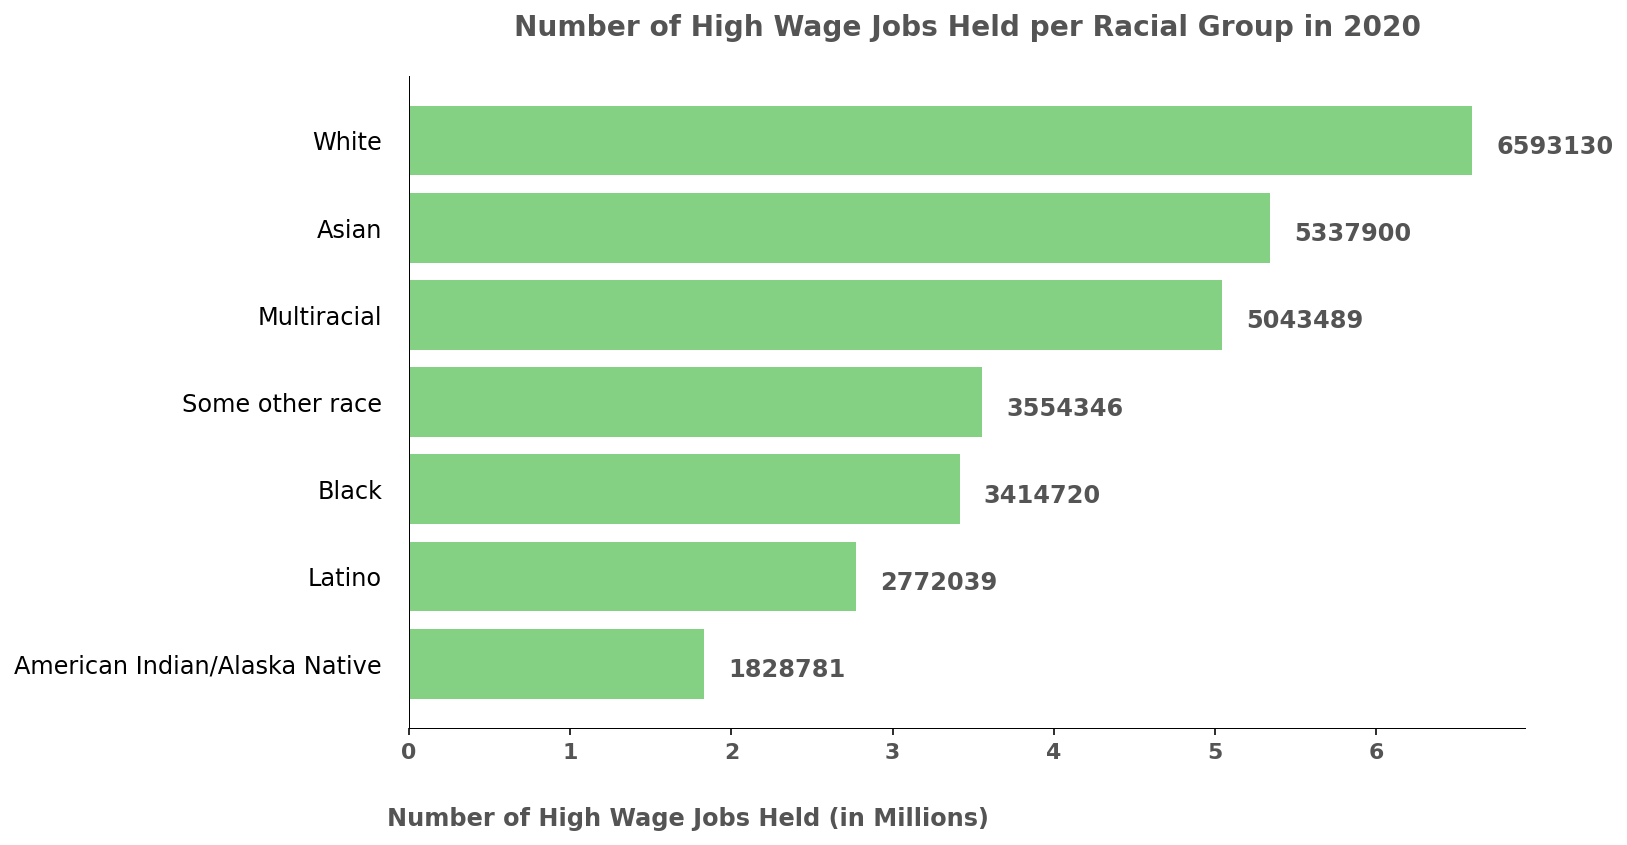

In [177]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(7), hw_race['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(7))
ax.set_yticklabels(hw_race.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("Number of High Wage Jobs Held (in Millions)", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.25, -0.12)
ax.set_xticklabels(['0', '1','2','3','4','5','6', '7'], 
                   fontsize=11, weight='bold', color = '#545454')

ax.set_title('Number of High Wage Jobs Held per Racial Group in 2020', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{int(hw_race['High Wage Count'].values[0])}", 
            (int(hw_race['High Wage Count'].values[0])+150000, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_race['High Wage Count'].values[1])}", 
            (int(hw_race['High Wage Count'].values[1])+150000, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_race['High Wage Count'].values[2])}", 
            (int(hw_race['High Wage Count'].values[2])+150000, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_race['High Wage Count'].values[3])}", 
            (int(hw_race['High Wage Count'].values[3])+150000, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_race['High Wage Count'].values[4])}", 
            (int(hw_race['High Wage Count'].values[4])+150000, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_race['High Wage Count'].values[5])}", 
            (int(hw_race['High Wage Count'].values[5])+150000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_race['High Wage Count'].values[6])}", 
            (int(hw_race['High Wage Count'].values[6])+150000, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

In [178]:
fig = px.treemap(hw_race, 
                 path=[px.Constant('Total'), hw_race.index], 
                 values='High Wage Count',
                )
fig.update_traces(root_color='lightgrey')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# Multiyear Visualizations

In [179]:
hw_2014 = pd.read_csv('data/outputs/hw_outputs_2014.csv')
hw_2015 = pd.read_csv('data/outputs/hw_outputs_2015.csv')
hw_2016 = pd.read_csv('data/outputs/hw_outputs_2016.csv')
hw_2017 = pd.read_csv('data/outputs/hw_outputs_2017.csv')
hw_2018 = pd.read_csv('data/outputs/hw_outputs_2018.csv')
hw_2019 = pd.read_csv('data/outputs/hw_outputs_2019.csv')
hw_2020 = pd.read_csv('data/outputs/hw_outputs_2020.csv')

In [180]:
hw_multiyear = pd.concat([hw_2014, hw_2015, hw_2016, hw_2017, hw_2018, hw_2019, hw_2020])

In [181]:
hw_multiyear.head()

,Industry,Date,Region,High Wage Count,Employment Count,Cost of Living
0,accommodation and food services,2014-01-01,Inland Empire,12184,123200.0,59469
1,accommodation and food services,2014-02-01,Inland Empire,12352,124900.0,59469
2,accommodation and food services,2014-03-01,Inland Empire,12490,126300.0,59469
3,accommodation and food services,2014-04-01,Inland Empire,12550,126900.0,59469
4,accommodation and food services,2014-05-01,Inland Empire,12659,128000.0,59469


In [182]:
hw_state = hw_multiyear.groupby(by=["Date"]).sum()
hw_state['Percentage'] = (hw_state['High Wage Count'] / hw_state['Employment Count']) * 100

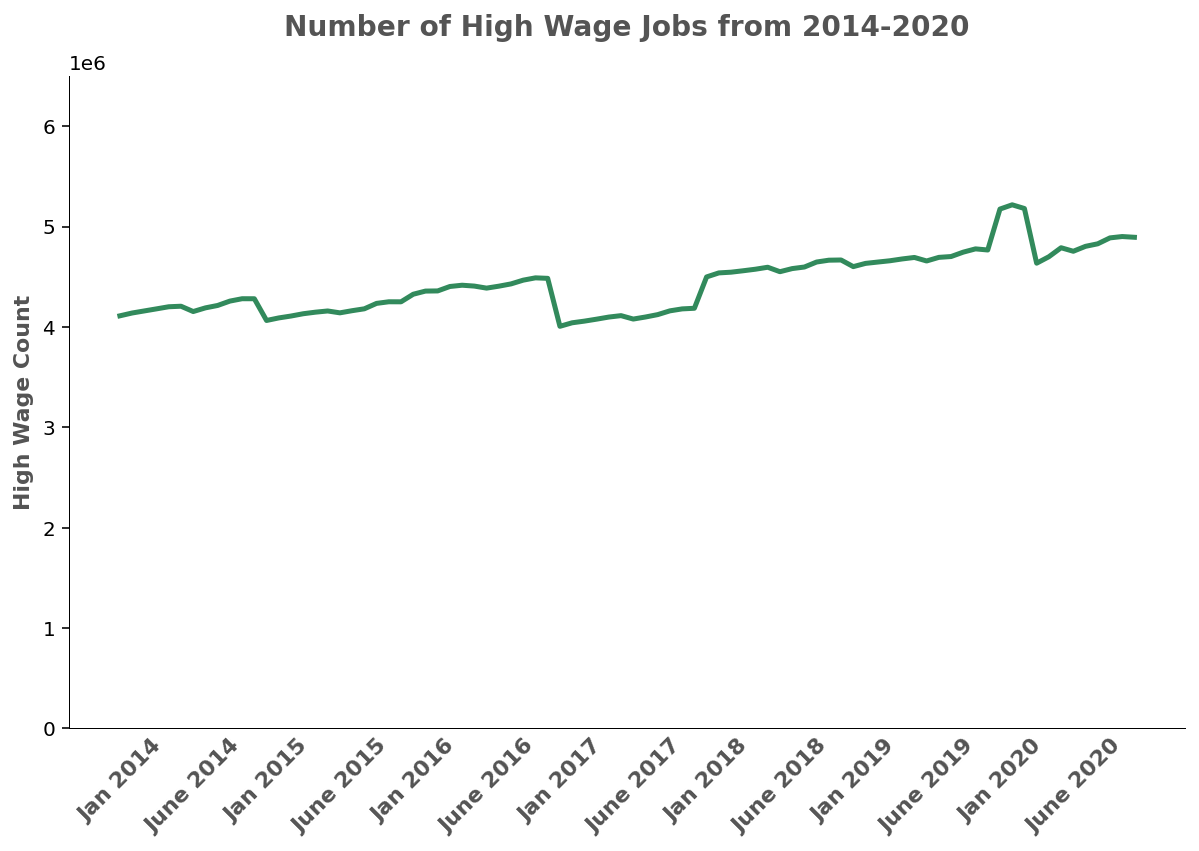

In [185]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['High Wage Count'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan 2014', 'June 2014', 'Jan 2015', 'June 2015', 'Jan 2016', 'June 2016', 
                    'Jan 2017', 'June 2017', 'Jan 2018', 'June 2018', 
                    'Jan 2019', 'June 2019', 'Jan 2020', 'June 2020'], 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)
ax.set_title('Number of High Wage Jobs from 2014-2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 84, 6))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0,6.5e+6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

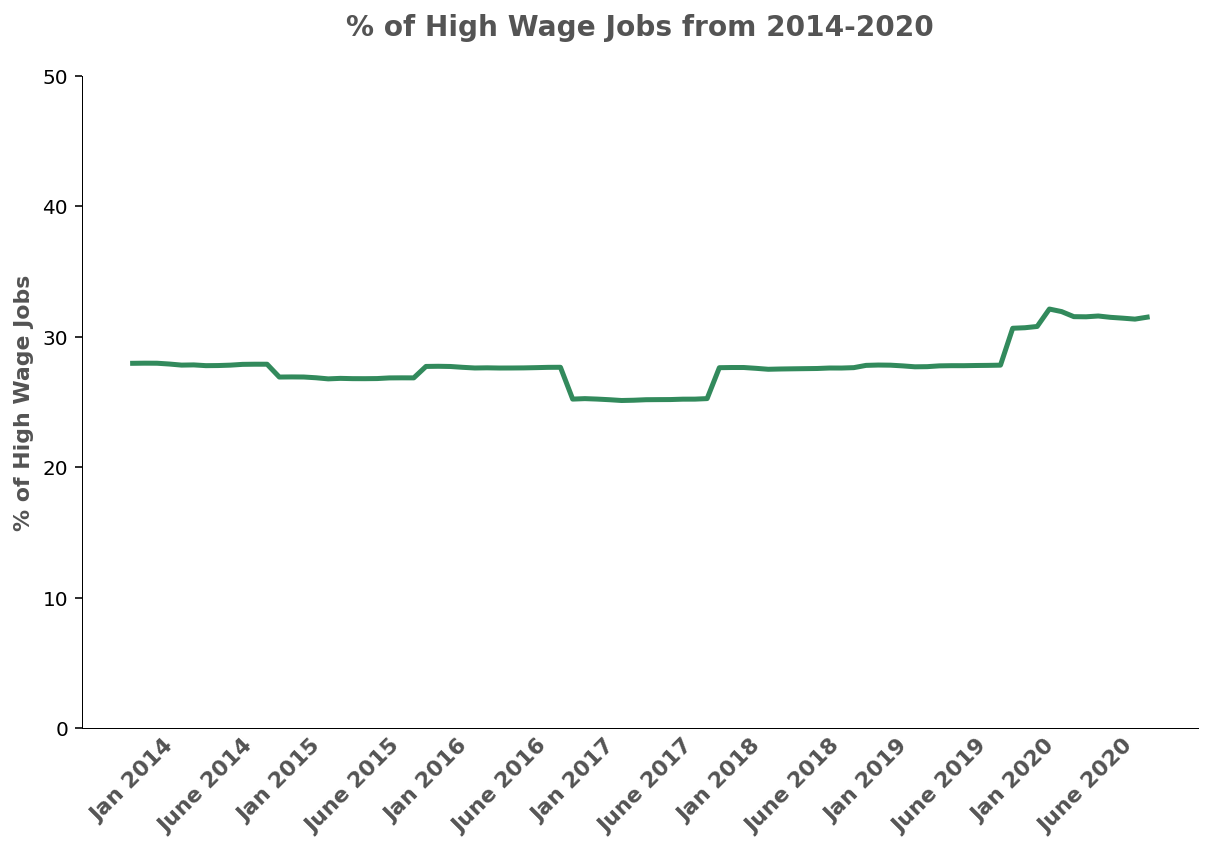

In [184]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['Percentage'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan 2014', 'June 2014', 'Jan 2015', 'June 2015', 'Jan 2016', 'June 2016', 
                    'Jan 2017', 'June 2017', 'Jan 2018', 'June 2018', 
                    'Jan 2019', 'June 2019', 'Jan 2020', 'June 2020'], 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)
ax.set_title('% of High Wage Jobs from 2014-2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 84, 6))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0,50)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

In [186]:
kern_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Kern']
csj_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Central San Joaquin']
nsj_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Northern San Joaquin']
ns_data = hw_multiyear.loc[hw_multiyear['Region'] == 'North State']
rc_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Redwood Coast']
sd_data = hw_multiyear.loc[hw_multiyear['Region'] == 'San Diego-Imperial']
orange_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Orange']
ie_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Inland Empire']
cc_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Central Coast']
bay_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Bay Area']
sac_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Sacramento']
la_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Los Angeles']

In [187]:
hw_kern = kern_data.groupby(by=["Date"]).sum()
hw_kern['Percentage'] = (hw_kern['High Wage Count'] / hw_kern['Employment Count']) * 100
hw_csj = csj_data.groupby(by=["Date"]).sum()
hw_csj['Percentage'] = (hw_csj['High Wage Count'] / hw_csj['Employment Count']) * 100
hw_nsj = nsj_data.groupby(by=["Date"]).sum()
hw_nsj['Percentage'] = (hw_nsj['High Wage Count'] / hw_nsj['Employment Count']) * 100
hw_ns = ns_data.groupby(by=["Date"]).sum()
hw_ns['Percentage'] = (hw_ns['High Wage Count'] / hw_ns['Employment Count']) * 100
hw_rc = rc_data.groupby(by=["Date"]).sum()
hw_rc['Percentage'] = (hw_rc['High Wage Count'] / hw_rc['Employment Count']) * 100
hw_sd = sd_data.groupby(by=["Date"]).sum()
hw_sd['Percentage'] = (hw_sd['High Wage Count'] / hw_sd['Employment Count']) * 100
hw_orange = orange_data.groupby(by=["Date"]).sum()
hw_orange['Percentage'] = (hw_orange['High Wage Count'] / hw_orange['Employment Count']) * 100
hw_ie = ie_data.groupby(by=["Date"]).sum()
hw_ie['Percentage'] = (hw_ie['High Wage Count'] / hw_ie['Employment Count']) * 100
hw_cc = cc_data.groupby(by=["Date"]).sum()
hw_cc['Percentage'] = (hw_cc['High Wage Count'] / hw_cc['Employment Count']) * 100
hw_bay = bay_data.groupby(by=["Date"]).sum()
hw_bay['Percentage'] = (hw_bay['High Wage Count'] / hw_bay['Employment Count']) * 100
hw_sac = sac_data.groupby(by=["Date"]).sum()
hw_sac['Percentage'] = (hw_sac['High Wage Count'] / hw_sac['Employment Count']) * 100
hw_la = la_data.groupby(by=["Date"]).sum()
hw_la['Percentage'] = (hw_la['High Wage Count'] / hw_la['Employment Count']) * 100

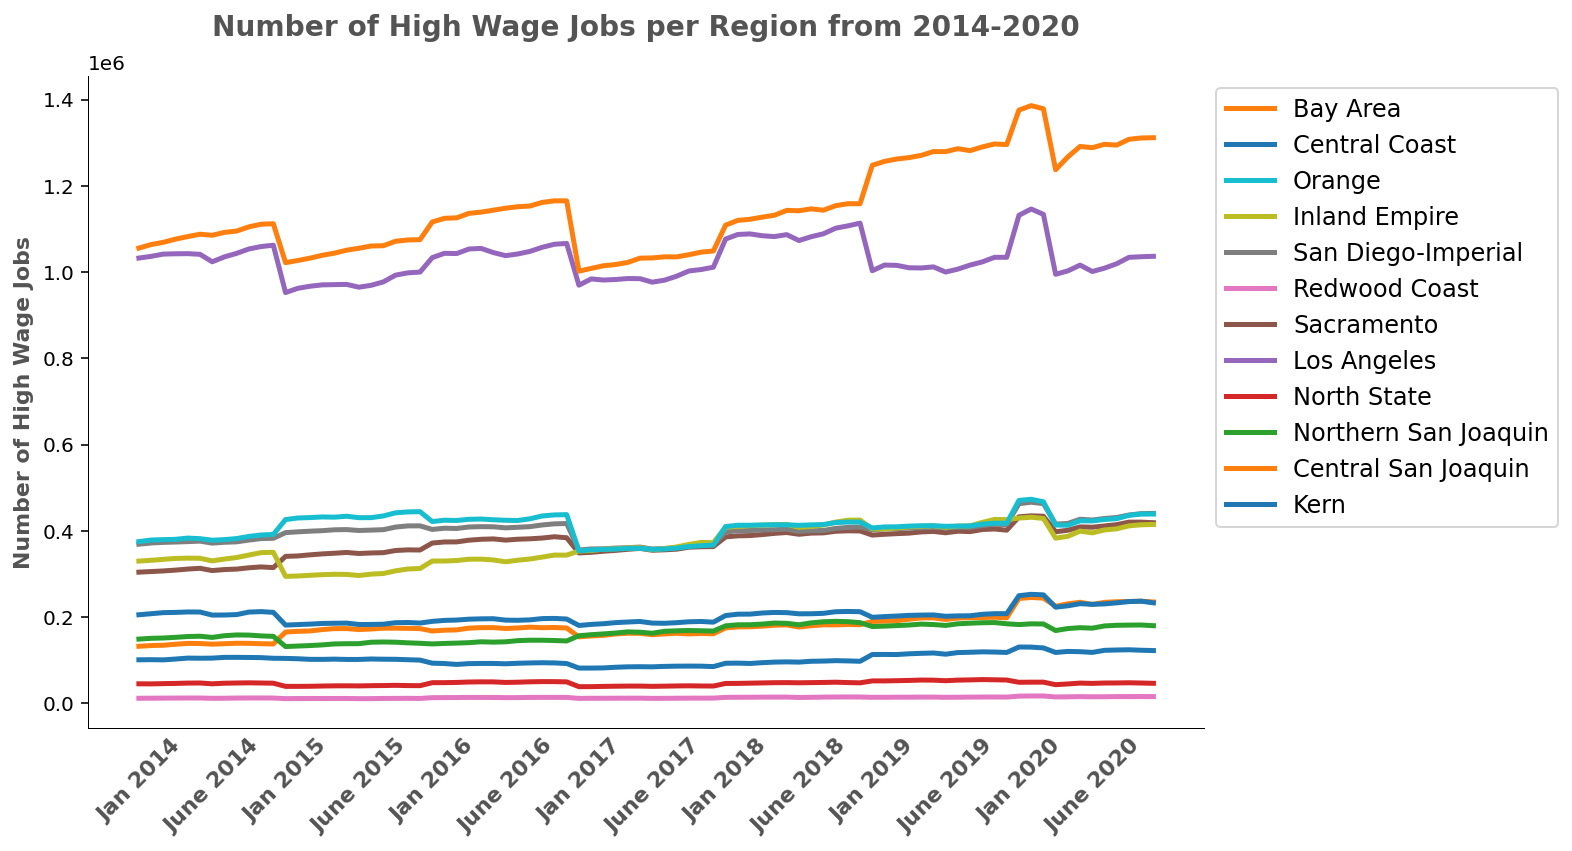

In [188]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_kern['High Wage Count'].values, lw=2.5, label='Kern')
ax.plot(hw_csj['High Wage Count'].values, lw=2.5, label='Central San Joaquin')
ax.plot(hw_nsj['High Wage Count'].values, lw=2.5, label='Northern San Joaquin')
ax.plot(hw_ns['High Wage Count'].values, lw=2.5, label='North State')
ax.plot(hw_la['High Wage Count'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['High Wage Count'].values, lw=2.5, label='Sacramento')
ax.plot(hw_rc['High Wage Count'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['High Wage Count'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['High Wage Count'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['High Wage Count'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['High Wage Count'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['High Wage Count'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan 2014', 'June 2014', 'Jan 2015', 'June 2015', 'Jan 2016', 'June 2016', 
                    'Jan 2017', 'June 2017', 'Jan 2018', 'June 2018', 
                    'Jan 2019', 'June 2019', 'Jan 2020', 'June 2020'], 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)
ax.set_title('Number of High Wage Jobs per Region from 2014-2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 84, 6))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('Number of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

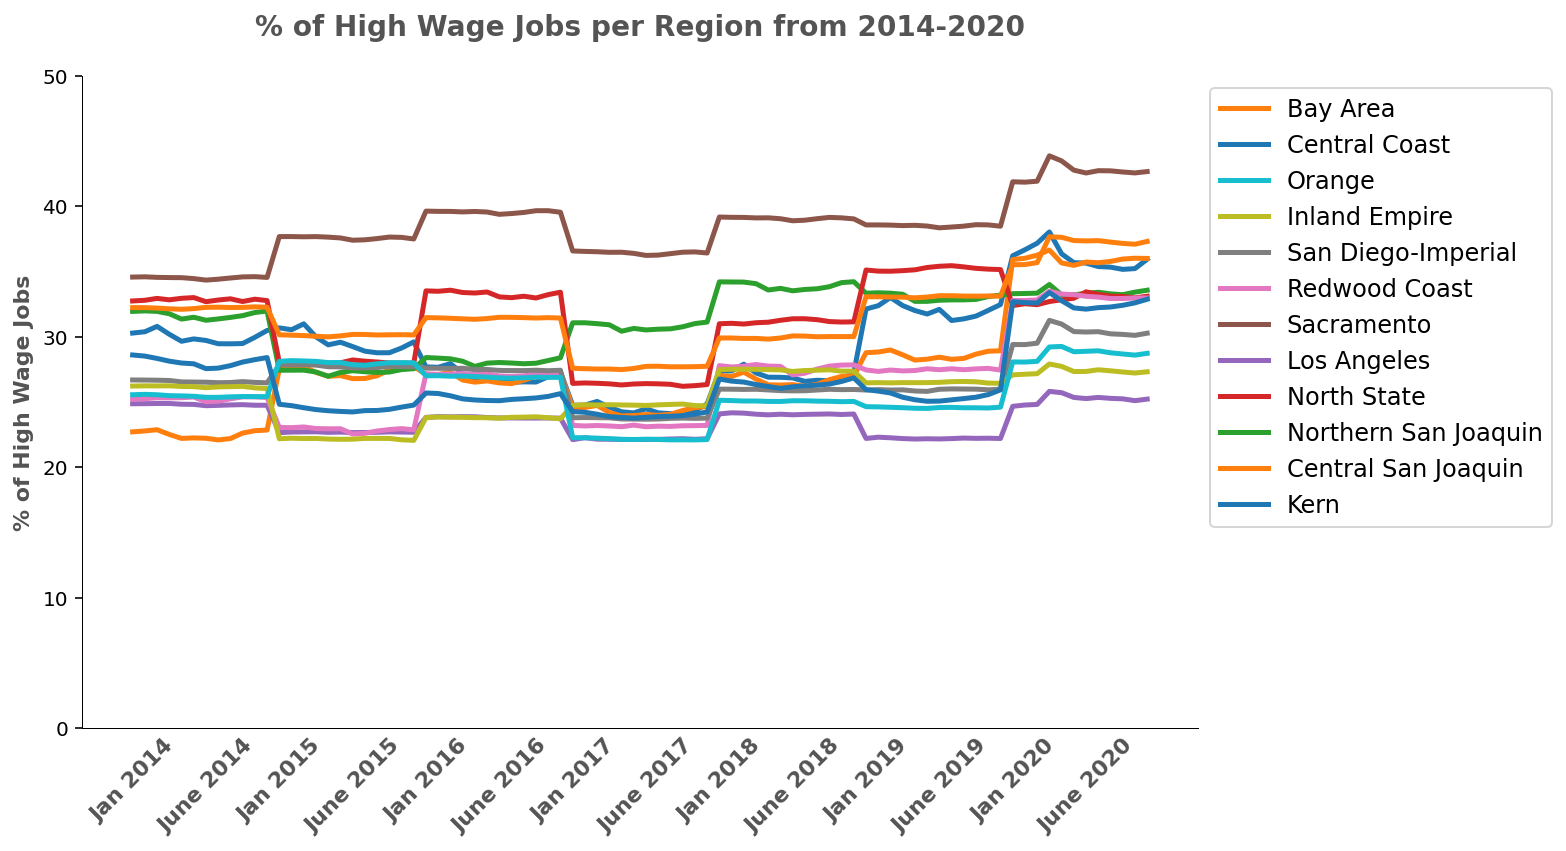

In [192]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_kern['Percentage'].values, lw=2.5, label='Kern')
ax.plot(hw_csj['Percentage'].values, lw=2.5, label='Central San Joaquin')
ax.plot(hw_nsj['Percentage'].values, lw=2.5, label='Northern San Joaquin')
ax.plot(hw_ns['Percentage'].values, lw=2.5, label='North State')
ax.plot(hw_la['Percentage'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['Percentage'].values, lw=2.5, label='Sacramento')
ax.plot(hw_rc['Percentage'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['Percentage'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['Percentage'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['Percentage'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['Percentage'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['Percentage'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan 2014', 'June 2014', 'Jan 2015', 'June 2015', 'Jan 2016', 'June 2016', 
                    'Jan 2017', 'June 2017', 'Jan 2018', 'June 2018', 
                    'Jan 2019', 'June 2019', 'Jan 2020', 'June 2020'], 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)
ax.set_title('% of High Wage Jobs per Region from 2014-2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 84, 6))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0, 50)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()